# Replication Notebook: Appendix

### Selective and Incentive Effects of Elections: Evidence from State Supreme Courts

### Elliott Ash and Bentley MacLeod


This notebook includes the stata code and outputs for the appendix results and robustness checks. Main results are included in the accompanying replication-main.ipynb.

---

### Load data and macros

In [1]:
set more off
set matsize 10000
capture quietly restore
clear all
use elections_ready, clear

local yvars "action_affirm_m txt_words txt_words_m txt_vocab_m txt_vocabnorm_m txt_words_per_sent txt_chars_per_word dis_numops con_numops proc_pubdays_m toc_total_m toc_unique_m casetype_admin_m casetype_con_m casetype_crim_m casetype_civ_m"
local qvars "numops cites_pos cites_pos_m cites_neg cites_neg_m cites_outstate cites_outstate_m cites_quote cites_quote_m cites_discuss cites_discuss_m cites_overruled cites_overruled_m cites_supersede cites_supersede_m cites10_pos cites10_pos_m"
local rule_controls "rule_adminoffice rule_iac rule_judgesup rule_ntou rule_termdown rule_termup rule_utop rule_ptonp rule_judicialexpend"
local judge_controls "x_startage x_female x_democrat x_republican x_topschool x_startage_missing x_female_missing x_democrat_missing x_topschool_missing"
local mainvars "txt_words_norm cites_pos_m_norm"
local additional_vars " txt_chars_norm txt_sents_norm  toc_total_norm cites_all_m_norm cites_discuss_m_norm  cites_outstate_m_norm"
local morevars "disc_numops_norm dis_numops con_numops casetype_admin_m casetype_crim_m casetype_con_m casetype_civ_m txt_words_m toc_unique_m_norm  cites_disting_m cites_neg_m cites_circuit_m cites_multuse_m proc_pubdays_m cites_overruled_m"
local caseX "pca_*"
local main_st "txt_words_norm_st cites_pos_m_norm_st" 
local main_j "txt_words_norm_j cites_pos_m_norm_j"
local additional_st "txt_chars_norm_st txt_sents_norm_st  cites_all_m_norm_st cites_discuss_m_norm_st  cites_outstate_m_norm_st" 
local additional_j "txt_chars_norm_j txt_sents_norm_j  cites_all_m_norm_j cites_discuss_m_norm_j cites_outstate_m_norm_j"

### Make directories if needed

In [2]:
capture quietly mkdir 4-appendix
cd 4-appendix
capture quietly mkdir 0-summ-stats
capture quietly mkdir 1-select
capture quietly mkdir 2-elect
capture quietly mkdir 3-retain



/home/elliott/Dropbox/Ash_MacLeod/2-elections/analysis/replication/4-appendix






Generate 10 principal component factors for alternative case controls specification.

In [3]:
pca ind_* law_*
predict pca10_1 pca10_2 pca10_3 pca10_4 pca10_6 pca10_7 pca10_8 pca10_9 pca10_10, score



Principal components/correlation                 Number of obs    =     15,010
                                                 Number of comp.  =        122
                                                 Trace            =        122
    Rotation: (unrotated = principal)            Rho              =     1.0000

    --------------------------------------------------------------------------
       Component |   Eigenvalue   Difference         Proportion   Cumulative
    -------------+------------------------------------------------------------
           Comp1 |      9.04926      4.51427             0.0742       0.0742
           Comp2 |      4.53499      .554797             0.0372       0.1113
           Comp3 |      3.98019      .462998             0.0326       0.1440
           Comp4 |       3.5172      .490261             0.0288       0.1728
           Comp5 |      3.02694     .0446914             0.0248       0.1976
           Comp6 |      2.98224       .14649             0.02

         Comp101 |      .110678    .00185952             0.0009       0.9870
         Comp102 |      .108819    .00297397             0.0009       0.9879
         Comp103 |      .105845    .00364193             0.0009       0.9888
         Comp104 |      .102203    .00441227             0.0008       0.9896
         Comp105 |     .0977908    .00114859             0.0008       0.9904
         Comp106 |     .0966422    .00706549             0.0008       0.9912
         Comp107 |     .0895767    .00141131             0.0007       0.9919
         Comp108 |     .0881654    .00421944             0.0007       0.9926
         Comp109 |     .0839459     .0035361             0.0007       0.9933
         Comp110 |     .0804098    .00253333             0.0007       0.9940
         Comp111 |     .0778765    .00187366             0.0006       0.9946
         Comp112 |     .0760028    .00102213             0.0006       0.9953
         Comp113 |     .0749807    .00157698             0.0006       0.9959

    ind_worker~p |   0.1086    0.1228    0.1442    0.0256   -0.0416   -0.2324   -0.0688   -0.1039   -0.1102   -0.0649    0.0922    0.0076    0.0610    0.1789    0.0052   -0.1119    0.0929    0.0623    0.0732    0.0329    0.0169    0.0806    0.0423 
    ind_agricu~m |   0.0494   -0.0162    0.0100   -0.0273   -0.0123   -0.0677    0.0866    0.0052    0.0242    0.0084    0.0099    0.0960   -0.0274   -0.0898    0.0024    0.0981    0.0565   -0.0434   -0.0014    0.3149    0.0668   -0.0679   -0.0515 
    ind_autoin~m |   0.0213    0.0500    0.1607   -0.0621    0.0133    0.2118   -0.1373   -0.0209    0.0411   -0.0244    0.0355    0.0983    0.0636   -0.0808    0.0856    0.0285    0.0474   -0.0254    0.0383   -0.0304   -0.0001    0.0656    0.0105 
    ind_automo~m |   0.0804   -0.0584    0.1310   -0.1091    0.1565    0.0215    0.1637   -0.0491    0.0112   -0.0148   -0.0080    0.0274   -0.0166   -0.1125   -0.0804   -0.0362    0.0596    0.2916   -0.0412   -0.0242    0.0074    0.0545   -0.0465 
    

    law_constr~w |   0.1184   -0.0025    0.0047   -0.0254    0.0350   -0.0351    0.0865    0.0139    0.0858    0.3225    0.0146    0.0202    0.2178    0.0550    0.0865   -0.1129   -0.0998   -0.0920    0.0162   -0.0028   -0.0327    0.0392   -0.0196 
    law_contra~s |   0.2318   -0.0778   -0.0606    0.0115   -0.0437    0.0004   -0.0708    0.0584   -0.0104    0.0576   -0.0105   -0.0552   -0.0113   -0.0176   -0.0606   -0.0030   -0.0814   -0.0479    0.0182    0.0110    0.0496   -0.0784    0.0098 
     law_crimlaw |  -0.0567    0.1385   -0.1578   -0.1817    0.0923   -0.0299   -0.0773   -0.1007    0.0255    0.0519    0.0981   -0.1430   -0.0684    0.0596   -0.0586    0.0112   -0.0624   -0.0917    0.0467   -0.0594   -0.0496    0.0166   -0.0250 
    law_damage~s |   0.2268   -0.0295    0.0564   -0.0506    0.0547    0.0325    0.0004    0.0021   -0.0329    0.0313   -0.0269   -0.0548   -0.0067    0.0251   -0.0935    0.0353   -0.0982    0.0826   -0.0048    0.0340   -0.0195   -0.0125   -0.0076 
    

    law_bankru~m |   0.0315    0.0077    0.0065   -0.0126   -0.1117    0.0195    0.0865    0.0032    0.0758   -0.0539   -0.0060   -0.0298    0.0372   -0.0468    0.0205   -0.0159   -0.0324    0.0176   -0.0571   -0.2389    0.0138   -0.1727    0.4302 
    law_civilr~m |   0.0033    0.1217    0.0094    0.0453    0.0001   -0.0047    0.0196    0.0849    0.0875    0.0409   -0.0956    0.0249   -0.0339   -0.1340    0.0838    0.1763    0.0295    0.0254   -0.0320    0.2210   -0.0232    0.1679    0.1445 
    law_civpro_m |   0.0532   -0.0663    0.0260    0.0714   -0.0935    0.0408   -0.0320    0.1275   -0.0257   -0.0665   -0.0983    0.0569    0.0458   -0.0105    0.0122    0.0199   -0.0738    0.0436   -0.0452    0.0471    0.0386   -0.0726    0.0415 
    law_conlaw_m |  -0.0440    0.1289   -0.0856    0.0877    0.0634    0.0861    0.0241   -0.0364    0.0159    0.0301    0.0286    0.0006    0.0620    0.0290    0.0864    0.0209   -0.0343    0.0741   -0.0961    0.1225    0.0857   -0.0384    0.0866 
    

    ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
        Variable |   Comp24    Comp25    Comp26    Comp27    Comp28    Comp29    Comp30    Comp31    Comp32    Comp33    Comp34    Comp35    Comp36    Comp37    Comp38    Comp39    Comp40    Comp41    Comp42    Comp43    Comp44    Comp45    Comp46 
    -------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   

    ind_childw~m |  -0.0218    0.0023    0.0737    0.0218   -0.0176    0.0209    0.0229    0.0158   -0.0321   -0.0160    0.1313    0.1268   -0.0934    0.0934    0.0870    0.0432   -0.1070   -0.0135    0.0278    0.0219    0.0915   -0.0305    0.0384 
    ind_constr~m |   0.0039   -0.0746   -0.0814   -0.0792   -0.0394    0.1015   -0.0456   -0.0273   -0.0085    0.0060    0.0008    0.0127    0.0009   -0.0248    0.0190    0.0108   -0.0139    0.0225    0.0271    0.0215   -0.0112   -0.0252   -0.0953 
    ind_educat~m |   0.0304    0.0058    0.0120   -0.0126    0.0029   -0.0102   -0.0548    0.0465    0.0619    0.0147    0.0272    0.0169   -0.0212   -0.0063    0.0264   -0.0307    0.0180   -0.0111    0.0149    0.0034   -0.0081    0.0152    0.0741 
    ind_employ~m |   0.1221    0.0486   -0.1230    0.0497    0.0538   -0.0076    0.0465    0.0809    0.1512    0.0150    0.2101   -0.0281   -0.1371   -0.0065   -0.1926    0.1659    0.0305    0.0363    0.0344   -0.0125   -0.0096    0.0641   -0.0426 
    

    law_employ~s |   0.0779   -0.0704   -0.0648    0.1015    0.0395    0.0368    0.1522    0.0130   -0.0163    0.0289    0.0906   -0.2064    0.1644   -0.1132    0.2783   -0.3229   -0.1466   -0.0441   -0.0475    0.0660   -0.0103   -0.0236   -0.0107 
    law_employ~w |  -0.0362    0.0188   -0.0038   -0.0283   -0.0080   -0.0271   -0.0518    0.0048    0.0232   -0.0077    0.0643    0.0593   -0.0894    0.0272   -0.1655    0.0711    0.0880    0.0067    0.0223   -0.0624   -0.0061   -0.0052    0.0533 
    law_energy~w |  -0.1024   -0.0095   -0.0272    0.0493   -0.0270    0.0565   -0.0665    0.0703   -0.1011    0.0148    0.0395   -0.0146   -0.1115   -0.0721    0.1231    0.0541    0.2454   -0.2415   -0.0565    0.0798   -0.0370   -0.0111   -0.0054 
      law_envlaw |   0.3016   -0.2466    0.1775   -0.1916    0.0146   -0.1834    0.1082    0.0669   -0.0266    0.0772    0.0560   -0.0472   -0.0656    0.0957   -0.0828   -0.0269    0.0853   -0.0400    0.0107    0.0411   -0.0165   -0.0056    0.0144 
    

    law_crimla~m |  -0.0520   -0.0286    0.0399    0.0180    0.0126    0.0200    0.0015    0.0033   -0.0093   -0.0436    0.0905    0.0300    0.0173    0.0503   -0.0816   -0.0661    0.0289   -0.0049   -0.0859   -0.0651   -0.0206    0.0144    0.0088 
    law_damage~m |   0.0731   -0.0009   -0.0009   -0.0211    0.0124   -0.0416   -0.0799    0.0325    0.1013   -0.0012   -0.0659    0.0526    0.0099    0.0830   -0.0326   -0.0297   -0.1679   -0.1841   -0.0111    0.0256    0.0821   -0.2008   -0.1778 
    law_educla~m |   0.0033   -0.0072    0.0439   -0.0292   -0.0052   -0.0049   -0.0527    0.0044    0.0443    0.0203    0.0197   -0.0382    0.0009    0.0057    0.0018   -0.0029   -0.0126   -0.0129    0.0199   -0.0052    0.0141    0.0074   -0.0805 
    law_electl~m |   0.1696    0.0435   -0.2320    0.1469    0.0771    0.1251    0.2535   -0.0269   -0.0843    0.0754    0.0542    0.2811    0.0209   -0.0190   -0.0420   -0.1105    0.0638   -0.1114    0.0662   -0.0443    0.0127   -0.0338    0.0772 
    

    ind_automo~s |   0.0272   -0.0889    0.0257   -0.0336    0.1948   -0.2026    0.1707   -0.0508    0.2102    0.0622   -0.1001   -0.0013   -0.0283   -0.0248   -0.0197   -0.0587   -0.0471    0.0708    0.0319   -0.0836   -0.1591   -0.1078    0.0402 
     ind_banking |   0.0059   -0.0044   -0.0008    0.0050    0.0238    0.0039   -0.0221    0.0099   -0.0118   -0.0184   -0.0161   -0.4709   -0.0831   -0.0071   -0.0250   -0.0111    0.0062    0.0846   -0.2107    0.2719    0.0595   -0.2016    0.0011 
    ind_bridge~s |  -0.0172    0.0955    0.0680   -0.0100    0.0184   -0.0373    0.0217    0.0067    0.0049   -0.0017    0.0000    0.0036   -0.0101   -0.0216   -0.0152   -0.0145   -0.0007    0.0345    0.0140   -0.0060   -0.0937   -0.0431    0.0536 
    ind_childw~e |  -0.0077    0.0625   -0.0339    0.0353    0.0203    0.0411    0.0885    0.3282   -0.1008    0.1187   -0.1294    0.0279   -0.0580   -0.0066   -0.0144    0.0059    0.1217    0.0217   -0.2096   -0.0999   -0.0154    0.0768    0.0143 
    

    ind_insura~m |   0.0212   -0.0051    0.0046    0.0198   -0.0203   -0.0098   -0.0093    0.0270   -0.0021    0.0084    0.0026   -0.0220    0.0798    0.0393    0.3797   -0.1351    0.1846   -0.1074   -0.0186    0.1263   -0.2318    0.0117    0.0745 
    ind_lawenf~m |   0.0458    0.0058   -0.0299   -0.0199    0.0717    0.0088    0.1169    0.1742   -0.0947    0.0689   -0.1011    0.0103   -0.0250   -0.0079   -0.0320   -0.0871    0.1353    0.0867    0.1243    0.0705    0.0771    0.0752    0.0612 
     ind_legal_m |  -0.0523    0.0142    0.0268    0.0334    0.0098    0.0374    0.0498    0.1069    0.0924   -0.4550   -0.1233    0.0283   -0.0277   -0.0298   -0.0144   -0.0193    0.0593    0.0797    0.0813   -0.0248   -0.0493    0.0194   -0.0091 
    ind_manufa~m |   0.0350   -0.0499    0.0285    0.0033    0.0123   -0.0085    0.0015    0.0183    0.0030   -0.0168    0.0047    0.0111   -0.0221    0.0154    0.0141    0.0295    0.0379    0.0136    0.0054   -0.0451    0.0142    0.0331    0.0003 
    

    law_govern~t |  -0.0110   -0.0127    0.0780    0.0109    0.0110    0.0256    0.0281    0.0321    0.0437    0.0074   -0.0058   -0.0139    0.0146    0.0132    0.0025    0.0273    0.0488   -0.1640    0.0850    0.0455    0.0727   -0.0525    0.1261 
      law_habeas |  -0.0590    0.0044    0.0044    0.0047   -0.0323    0.0016    0.0075   -0.0033    0.0096   -0.0049    0.0190   -0.0043    0.0095    0.0123    0.0379    0.0630    0.1252    0.0017   -0.0984   -0.0592    0.0367    0.0432    0.0799 
    law_health~w |  -0.1743   -0.1660    0.0086    0.0679    0.0409    0.0092   -0.0009    0.0197   -0.0381    0.0062    0.0051   -0.0044    0.0199   -0.0037   -0.0149    0.0237   -0.0829   -0.0593   -0.0908    0.0426    0.0073    0.0228    0.0307 
    law_insura~w |  -0.0015   -0.0241   -0.0101   -0.0170    0.0074   -0.0198    0.0217   -0.0254    0.0059    0.0076   -0.0122    0.0173   -0.1192   -0.0246   -0.3870    0.1824   -0.2532    0.1122    0.0587   -0.1498    0.3064   -0.0048   -0.0831 
    

    law_energy~m |  -0.0034    0.0123    0.0039   -0.0284    0.0012   -0.0092   -0.0058    0.0256    0.0038   -0.0001   -0.0007   -0.0118   -0.0002    0.0082    0.0020    0.0158   -0.0056    0.0194   -0.0421   -0.0116    0.0323    0.0006    0.0170 
    law_envlaw_m |  -0.0171    0.0153    0.0211   -0.0038    0.0001   -0.0160    0.0033    0.0048   -0.0046    0.0006   -0.0198    0.0098    0.0021    0.0092    0.0182    0.0004    0.0481    0.0634    0.0143    0.0166    0.0065   -0.0217    0.0273 
    law_eviden~m |  -0.4575   -0.0642    0.1460   -0.0032   -0.2629    0.0075   -0.1861   -0.1076    0.1161    0.0201    0.0364    0.0102   -0.0509   -0.0314    0.0028   -0.0224    0.0279    0.0357    0.1333    0.1364    0.1503    0.0623    0.0244 
    law_family~m |   0.1077   -0.0603   -0.0047   -0.0908    0.0478   -0.0841   -0.0703   -0.4066    0.0865   -0.2041    0.1676   -0.0433    0.1125    0.0170    0.0862    0.0912   -0.1783    0.0180    0.2630    0.1369    0.0175   -0.1018   -0.0171 
    

    ind_employ~t |   0.0162   -0.0969   -0.0297    0.0145   -0.0857   -0.0640    0.0550    0.0023   -0.0854   -0.0005   -0.1083   -0.0555    0.0440    0.0385   -0.1076    0.0379   -0.0156   -0.0920    0.0226    0.0346    0.0321   -0.0529   -0.0029 
      ind_health |  -0.0027    0.2739    0.2118   -0.0343   -0.0805    0.0669   -0.1608   -0.1390   -0.0528    0.0542    0.0913   -0.0504    0.0227    0.0058   -0.0984   -0.0477    0.0510    0.1243   -0.0624    0.0685    0.0471    0.0583    0.0048 
    ind_hospit~s |  -0.0064    0.1367    0.1610   -0.0368   -0.1031    0.0344    0.0001    0.0135   -0.0621   -0.0733   -0.0395    0.0978   -0.0367   -0.0376    0.0815    0.1373   -0.0556   -0.3313    0.1392   -0.1202   -0.1308   -0.1711   -0.0142 
    ind_insura~e |   0.0140   -0.0810   -0.0462   -0.0380    0.0380   -0.0168   -0.0051   -0.0593   -0.1255   -0.0005   -0.0646   -0.0545   -0.0741   -0.0140    0.0173    0.0341    0.1176    0.0193   -0.0650    0.0514    0.2434    0.0129    0.0732 
    

    ind_proper~m |   0.0715   -0.0011   -0.0325    0.1365   -0.0552   -0.0164    0.0120   -0.1194   -0.0293   -0.1308   -0.0379    0.1657    0.0768   -0.0058   -0.1871   -0.1278    0.0199    0.1069    0.0354   -0.2442    0.0468   -0.1010   -0.0461 
    ind_railro~m |  -0.0683    0.0196    0.0006   -0.0060   -0.0014    0.0640    0.0840    0.0337    0.0975    0.0362   -0.0241    0.0563    0.0027    0.0403   -0.1590   -0.0676   -0.1077   -0.1004    0.1445    0.0036    0.2955   -0.0928    0.2652 
    ind_reales~m |   0.0862   -0.0291   -0.0406    0.0392   -0.0152    0.0693   -0.0360   -0.0040    0.0130   -0.0801   -0.0739    0.0193    0.0443   -0.0364    0.0662   -0.0136    0.0147    0.0466    0.0287    0.0230   -0.0367    0.0181    0.0011 
       ind_tax_m |  -0.0705    0.0196   -0.0916    0.1213    0.0044   -0.1085   -0.0835    0.0497   -0.0035    0.0328    0.0391   -0.0295   -0.0602   -0.0072    0.0288    0.0056   -0.0284   -0.0227    0.0577    0.0050    0.0273   -0.0076   -0.0274 
    

    law_mortga~s |  -0.2130   -0.1127    0.0448    0.2561   -0.1797    0.0962   -0.0472    0.0070   -0.0369    0.0168    0.0362    0.0212   -0.0274   -0.0496    0.0589   -0.0010    0.0159    0.0421    0.0010    0.0182    0.0214    0.0389   -0.0298 
    law_profresp |  -0.0295    0.0534    0.0599    0.2176    0.2462    0.0666    0.1899    0.0068   -0.0178    0.0779    0.0045   -0.0853   -0.0665   -0.0265   -0.0522   -0.0018    0.0256    0.0099   -0.0041    0.0365   -0.0692    0.0177   -0.0406 
    law_realpr~y |  -0.1003    0.0568    0.0631   -0.0338    0.0293   -0.0781    0.0291    0.0241   -0.0081    0.1037    0.0753   -0.0346    0.0108    0.0310   -0.0422    0.0078   -0.0269   -0.0046   -0.0364    0.0364    0.0335   -0.0499   -0.0026 
      law_seclaw |   0.0142    0.0256   -0.0543   -0.0063   -0.0176   -0.0024    0.0374   -0.0082    0.1762   -0.4050    0.3464   -0.3067    0.0651   -0.0725   -0.0020    0.1120    0.0214    0.0045   -0.0359    0.0993    0.0920   -0.0824   -0.0077 
    

    law_health~m |   0.0145   -0.2671   -0.1895    0.0440    0.1370   -0.1178    0.1540    0.0680    0.0663   -0.0885   -0.0551    0.0968   -0.0230    0.0301    0.0427    0.0088   -0.0327   -0.0209   -0.0100   -0.0372    0.0028   -0.0033   -0.0267 
    law_insura~m |  -0.0045    0.0771    0.0720    0.0382    0.0059   -0.0318    0.0371    0.0143    0.0638   -0.0236   -0.0246    0.0390    0.0384    0.0149    0.0026    0.0234   -0.0240   -0.0028   -0.0087   -0.0272   -0.0064   -0.0093   -0.0043 
    law_laborl~m |   0.0263    0.0238    0.0720    0.0695    0.1420    0.0801   -0.0648   -0.1441    0.0189    0.0603    0.0228    0.1482    0.0037   -0.0724    0.1083    0.1207   -0.1246   -0.0054   -0.0442    0.0415    0.0510   -0.1995    0.0618 
    law_landlo~m |   0.0431   -0.0434    0.0015    0.0201   -0.0867    0.0614    0.0458   -0.0396   -0.0928    0.0127   -0.1375    0.0677    0.1059    0.0174    0.0823    0.1518    0.1636   -0.0171   -0.1321    0.2583    0.1800   -0.0498   -0.2933 
    

    ind_manufa~g |  -0.0965   -0.1328    0.1965   -0.0897    0.0771   -0.0519   -0.0168   -0.0487   -0.0365   -0.0059    0.0321    0.0312    0.0105    0.0094    0.0332    0.0070   -0.0169    0.0031    0.0373    0.0031    0.0358   -0.0123    0.0060 
    ind_mortga~s |  -0.0739    0.0032    0.0234   -0.0275    0.0256   -0.0105    0.0518   -0.0596    0.0264    0.0242   -0.0395   -0.1349   -0.0428    0.0070    0.0392    0.1358    0.2154   -0.2980    0.1286    0.0587    0.0549    0.0396   -0.0053 
      ind_oilgas |  -0.0087    0.0625   -0.0958   -0.0752   -0.0134   -0.0242    0.1317    0.1399   -0.0173   -0.4513    0.1687    0.0019   -0.0761    0.0964    0.0632    0.0322   -0.0242    0.0080    0.0126    0.0459    0.0249    0.0038    0.0291 
    ind_proper~e |   0.0116    0.0439   -0.3190   -0.0317   -0.1228    0.0886    0.0983    0.0101   -0.1289    0.1055   -0.2047   -0.0318   -0.0074    0.0315   -0.0018    0.0036    0.0097    0.0273    0.0022   -0.0070   -0.0463    0.0053    0.0083 
    

    ind_worker~m |  -0.0301    0.0995   -0.0045    0.0473    0.0461   -0.0465    0.1246   -0.0366   -0.0974   -0.0053    0.0087   -0.0116   -0.0061   -0.0363   -0.0254    0.0386   -0.0237    0.0117   -0.0207   -0.0661   -0.0124   -0.1034    0.0449 
    law_adminlaw |  -0.0336   -0.1340   -0.0618   -0.0378   -0.0773    0.2263    0.1608   -0.0655   -0.2129   -0.0131    0.0883    0.2115    0.0087   -0.2452    0.0206    0.0399    0.1198    0.0166    0.1164    0.0377   -0.0062    0.0045   -0.0531 
    law_agency~w |  -0.0182   -0.0147   -0.0646   -0.0715    0.1460    0.0644   -0.0398    0.0501    0.0687   -0.0103   -0.0161   -0.0375    0.0106   -0.0045    0.0154    0.0133    0.0110   -0.0253    0.0437   -0.0169    0.0056   -0.0579    0.0079 
    law_appell~o |  -0.2770    0.1449   -0.1023    0.1222   -0.1088   -0.0185   -0.1365    0.0599   -0.0157   -0.0174   -0.1137    0.0388   -0.0388   -0.0707    0.0095   -0.0681    0.0456   -0.0030    0.0039    0.0104    0.0024    0.0127    0.0169 
    

    law_traffi~w |   0.0392   -0.1378   -0.0645   -0.0276    0.0687   -0.0590   -0.0914   -0.1389   -0.1017   -0.1545   -0.0620    0.0844    0.2464    0.2625   -0.0685    0.0798    0.0650   -0.1050   -0.1404   -0.1614   -0.1389    0.0190    0.0507 
    law_transp~w |   0.0513    0.0531    0.0569   -0.0247   -0.0223   -0.0070   -0.0139    0.0022   -0.0232    0.1016    0.0376    0.0766   -0.3091    0.2110    0.0143    0.0213    0.0159   -0.0304    0.0031   -0.1288   -0.0603   -0.0352    0.0320 
    law_willst~s |  -0.0188   -0.1811   -0.0092    0.0025    0.2449   -0.0055   -0.2954    0.0723   -0.2021   -0.1621   -0.0815   -0.2752   -0.1398   -0.0940    0.0663   -0.0391    0.0346    0.0206   -0.0221    0.0063   -0.0234   -0.0576   -0.0610 
    law_worker~p |   0.0191   -0.0653    0.0113   -0.0312   -0.0122    0.0546   -0.0496    0.0163   -0.0014    0.0071   -0.0207    0.0017    0.0142   -0.0039   -0.0054   -0.0008   -0.0468    0.0184    0.0076   -0.0980   -0.0092   -0.0349    0.0329 
    

    law_realpr~m |  -0.0350    0.0116   -0.0827    0.0118    0.0758    0.0806    0.0292   -0.0593    0.0084   -0.0432   -0.0484   -0.1736   -0.0522   -0.0249   -0.0274   -0.0205   -0.0008    0.0712   -0.0229    0.0029   -0.0538   -0.0066   -0.0710 
    law_seclaw_m |  -0.0539    0.0206   -0.0828    0.0744   -0.0838   -0.0310   -0.0016   -0.0250    0.0540   -0.0376   -0.0301    0.0070    0.0079    0.0124   -0.0089   -0.0094    0.0101   -0.0131   -0.0008    0.0009   -0.0045   -0.0073   -0.0077 
    law_taxlaw_m |  -0.0149    0.0282    0.0299    0.0445    0.0324    0.0049    0.0096    0.0711    0.0200    0.0043    0.0244    0.0223    0.0237    0.0186    0.0603    0.0016    0.0316    0.0068    0.0399    0.0363    0.0052   -0.0119   -0.0223 
    law_tortla~m |  -0.0234    0.0211    0.0584   -0.0384    0.0481   -0.0199   -0.0557    0.0287   -0.0324   -0.0563    0.0166    0.1426    0.0616    0.1075    0.0242    0.0042   -0.0202   -0.0603   -0.0044   -0.0532   -0.0246   -0.1774   -0.2581 
    

    law_civilr~s |  -0.0012   -0.0155    0.0160   -0.0085   -0.0059    0.0047    0.0108 |           0 
      law_civpro |  -0.0440    0.1525    0.0707    0.0122   -0.0312    0.0182    0.0189 |           0 
      law_conlaw |   0.0023   -0.0453   -0.0071   -0.0017    0.0067    0.0128   -0.0082 |           0 
    law_constr~w |   0.0157   -0.0023   -0.0036    0.0286    0.0195   -0.0065    0.0166 |           0 
    law_contra~s |  -0.2532    0.0424    0.0194    0.0083    0.1846   -0.0455   -0.0341 |           0 
     law_crimlaw |   0.0027   -0.0074    0.0003   -0.0051    0.0057    0.0015   -0.0012 |           0 
    law_damage~s |  -0.0668    0.1369    0.0753    0.0104   -0.0804    0.0218    0.0202 |           0 
     law_educlaw |   0.0457    0.0546   -0.0367    0.0016    0.0199    0.0060   -0.0052 |           0 
    law_electlaw |   0.0055    0.0329    0.0066    0.0177    0.0062   -0.0009   -0.0057 |           0 
    law_employ~s |   0.0088    0.0050   -0.0139    0.0085   -0.0233   -0.

    ind_autoin~e |   0.0786    0.0746    0.1269   -0.0768    0.0294    0.2151   -0.1614   -0.0318    0.0358   -0.0130    0.0356    0.0571    0.0533   -0.0642    0.0691    0.0257    0.0275   -0.0255    0.0482   -0.0337   -0.0122    0.0700    0.0044 
    ind_automo~s |   0.1544   -0.0162    0.0795   -0.1190    0.1748    0.0247    0.1176   -0.0569    0.0024   -0.0070   -0.0051   -0.0221   -0.0268   -0.0729   -0.0879   -0.0345    0.0298    0.2751   -0.0198   -0.0340   -0.0139    0.0598   -0.0538 
     ind_banking |   0.1391    0.0851   -0.0680   -0.0908   -0.2447    0.0457    0.1353   -0.0192    0.2181   -0.1501   -0.0011   -0.1142    0.0856    0.0635   -0.0877    0.0134    0.0534   -0.0254   -0.0156   -0.0066   -0.0085    0.0167   -0.0371 
    ind_bridge~s |   0.0767   -0.0209    0.0154   -0.0328    0.0658   -0.0327    0.0570    0.0001    0.0179    0.1151    0.0035    0.0144    0.0834    0.0640    0.0079    0.0245    0.0721   -0.0374   -0.1928    0.0615   -0.2716    0.1060    0.1445 
    

    ind_hospit~m |   0.0211    0.0672    0.0366    0.0142   -0.0160    0.0376    0.0325    0.0511    0.0832    0.0232   -0.1161    0.1139   -0.1536    0.0419   -0.0200   -0.0418   -0.1052    0.0301    0.0376   -0.0950    0.0793    0.0885   -0.1294 
    ind_insura~m |   0.0690    0.0321    0.1840   -0.0440   -0.0435    0.2112   -0.1899   -0.0287   -0.0124   -0.0554    0.0375    0.0598    0.0788   -0.0124    0.0594    0.0019    0.0118   -0.0982   -0.0501    0.0305   -0.0387   -0.0566   -0.0012 
    ind_lawenf~m |  -0.0148    0.1626    0.0143   -0.0566    0.0624    0.0182   -0.0045   -0.0654    0.0588    0.1290    0.0568   -0.0856   -0.0825    0.0118   -0.0776    0.1046    0.0612   -0.0522   -0.0434    0.0484    0.1225   -0.0445    0.1271 
     ind_legal_m |  -0.0109    0.1336   -0.0153    0.0232   -0.1216    0.1598    0.1844    0.0610   -0.3651    0.0643   -0.0314   -0.0401    0.0595   -0.0394   -0.0635   -0.0126    0.0300   -0.0230   -0.0199   -0.0044    0.0011    0.0129   -0.0344 
    

    law_family~w |   0.1696    0.0391   -0.2300   -0.0785    0.0142   -0.0700   -0.0942    0.0399   -0.0499   -0.1000   -0.0529    0.1338    0.0562   -0.0713    0.0787   -0.0030   -0.0159    0.0014    0.0095    0.0013   -0.0259    0.0039    0.0117 
    law_govern~t |   0.0506    0.0125   -0.0782    0.1727    0.0754    0.0625   -0.0275    0.0638    0.0633    0.0058   -0.0909   -0.1435    0.0517    0.0830    0.0812    0.0433    0.0021    0.1324   -0.0845    0.0957   -0.0091    0.1010    0.0700 
      law_habeas |   0.0413    0.0229   -0.1823   -0.0442    0.0648   -0.0339   -0.0795    0.0068   -0.0257   -0.0909   -0.0663    0.0225    0.1332    0.0340    0.0810   -0.0872   -0.1639    0.1483   -0.0428   -0.0561   -0.0152    0.0024   -0.0649 
    law_health~w |   0.0615    0.1454    0.0186    0.0181   -0.0009    0.0116    0.0274    0.0640    0.0815    0.0432   -0.2163    0.1752   -0.2735    0.1584    0.0039   -0.1128   -0.0210   -0.0748   -0.0139   -0.0043   -0.0161    0.0393    0.0154 
    

    law_empl~w_m |   0.0508    0.1308    0.1348    0.1539   -0.0386   -0.1552   -0.0302    0.0891    0.0384   -0.0045   -0.0457   -0.0487    0.0010   -0.1801   -0.0197    0.0690   -0.0519   -0.0285   -0.0731    0.0016    0.0025    0.0009    0.0315 
    law_energy~m |   0.0061   -0.0197    0.0253    0.0268   -0.0112    0.0166    0.0275    0.0123   -0.0048    0.0414    0.0431    0.1017   -0.0086    0.2072    0.0767    0.3679   -0.0883    0.0970   -0.0841   -0.2261    0.0134   -0.0579   -0.1128 
    law_envlaw_m |  -0.0077    0.0668    0.0144    0.0409    0.0050    0.0311   -0.0015   -0.0053    0.0550    0.0702   -0.0352    0.0263   -0.0084    0.0371    0.1228    0.1345    0.2130    0.0586    0.1811    0.1406    0.0611   -0.1454   -0.0607 
    law_eviden~m |   0.0633    0.0760   -0.0006   -0.1568    0.1125   -0.0652    0.0824   -0.0833   -0.0080    0.0401    0.0686    0.0414   -0.0433    0.0020   -0.0710    0.0468    0.0234   -0.0121   -0.0433    0.0352    0.0442   -0.0066   -0.0030 
    

    ind_educat~n |   0.0253   -0.0123    0.0170   -0.0107    0.0097   -0.0135   -0.0470    0.0315    0.0380   -0.0048    0.0297    0.0122   -0.0057   -0.0082    0.0079   -0.0481    0.0212   -0.0193    0.0171    0.0024   -0.0233    0.0191    0.0713 
    ind_employ~t |   0.1077    0.0348   -0.0995    0.0452    0.0560   -0.0047    0.0446    0.0698    0.1328    0.0023    0.2066   -0.0354   -0.1228   -0.0149   -0.1921    0.1389    0.0281    0.0186    0.0384   -0.0210   -0.0215    0.0646   -0.0437 
      ind_health |   0.0942   -0.1028    0.0121    0.1901   -0.1440    0.0555   -0.1012   -0.0106    0.0480    0.0009    0.0138   -0.0697    0.0094    0.0476   -0.0288    0.0127   -0.0502   -0.0665   -0.0055    0.0451   -0.0688    0.0349    0.3300 
    ind_hospit~s |  -0.1101    0.1608   -0.0302   -0.3000    0.3334   -0.0931    0.2158    0.0167    0.0251   -0.0270   -0.0507    0.0709    0.0138   -0.0022    0.0411   -0.0398    0.0105    0.0380   -0.0078    0.0005    0.0019    0.0317    0.1531 
    

    ind_oilgas_m |  -0.0048   -0.0276    0.0127    0.0474   -0.0616   -0.0322    0.0374   -0.0450    0.0461    0.0104    0.0178    0.0636    0.1357    0.0644   -0.1410   -0.0857   -0.2414    0.3511    0.1385   -0.0743    0.0396    0.0752    0.0311 
    ind_proper~m |   0.1107    0.1984   -0.0896   -0.0346    0.0429    0.1048    0.0069    0.0001   -0.1447    0.2051   -0.0266   -0.0306    0.4023   -0.0083   -0.1651    0.2419   -0.0244   -0.1284   -0.1440    0.0041   -0.0244    0.0256    0.0115 
    ind_railro~m |   0.2183    0.2264    0.2019   -0.0310   -0.1746    0.1900    0.0949    0.1437    0.1036   -0.1014   -0.0061    0.0547   -0.1068   -0.0936    0.0969    0.0356   -0.0107    0.0770   -0.0222   -0.0709   -0.1831   -0.0511   -0.0417 
    ind_reales~m |   0.0641    0.0581   -0.0904    0.0093    0.0157   -0.0017   -0.0479    0.0681    0.1079    0.0357   -0.0504    0.0962   -0.1812    0.0871    0.1317   -0.1124    0.0725    0.1252   -0.1888   -0.0303   -0.0315   -0.0099    0.0857 
    

    law_landlo~t |  -0.2566   -0.1522   -0.0159   -0.0739   -0.1515    0.0803    0.3086   -0.0164    0.2702    0.0470    0.1895   -0.0283    0.0443    0.0065    0.0815    0.1337    0.0117   -0.0935    0.0342   -0.0063   -0.0231   -0.0087    0.0038 
    law_mortga~s |   0.0058   -0.0214    0.0050   -0.0022   -0.0196   -0.0062   -0.0306   -0.0033   -0.0167    0.0007   -0.0067   -0.0364    0.0085   -0.0224   -0.0035   -0.0089   -0.0047    0.0214   -0.0281   -0.0457    0.0338    0.0246   -0.0144 
    law_profresp |  -0.0193   -0.0021    0.0347    0.0017    0.0124    0.0215    0.0072    0.0090   -0.0395    0.0222    0.0097    0.0006   -0.0088    0.0029   -0.0284   -0.0157    0.0548    0.0100    0.0407   -0.0288   -0.0001   -0.0135    0.0087 
    law_realpr~y |   0.0241    0.0099   -0.0321    0.0050    0.0249   -0.0229   -0.0232    0.0331   -0.0344    0.0223   -0.0241    0.0017   -0.0801    0.0383    0.0026   -0.0963    0.0337    0.0364   -0.1560   -0.1240   -0.0119    0.0102    0.0175 
    

    law_habeas_m |   0.0339   -0.0548    0.0420    0.0064    0.0146   -0.0308   -0.1015    0.1453    0.3479    0.3250   -0.1584   -0.0897    0.1740   -0.0829   -0.0379   -0.0495    0.1836    0.0939   -0.0394   -0.0697   -0.0158   -0.0902    0.0381 
    law_health~m |   0.0418   -0.0165   -0.0283    0.0668   -0.0045    0.0546    0.0232    0.0438   -0.0290    0.0521    0.0496    0.0116    0.0129    0.0200    0.0043   -0.0129    0.0801    0.0693    0.0135   -0.0458    0.0589   -0.0059   -0.4046 
    law_insura~m |  -0.0094   -0.0006   -0.0129    0.0276    0.0094    0.0291   -0.0007    0.0424    0.0089    0.0204    0.0184    0.0241    0.0259   -0.0036    0.0353    0.0216    0.0367    0.0673   -0.0023    0.0043    0.0428   -0.0032    0.0276 
    law_laborl~m |  -0.0437   -0.1303    0.0633    0.1204   -0.0807   -0.0049    0.1053   -0.0494   -0.1015    0.0498   -0.3238    0.2056    0.0733    0.2716    0.1251    0.1041    0.0874    0.0630   -0.0229    0.0106    0.0230   -0.0040    0.0272 
    

       ind_legal |  -0.0436    0.0100    0.0223    0.0362    0.0036    0.0297    0.0464    0.1101    0.0880   -0.4418   -0.1233    0.0169   -0.0302   -0.0344    0.0052    0.0351   -0.0531   -0.0949   -0.0868    0.0224    0.0455   -0.0255    0.0150 
    ind_manufa~g |   0.0407   -0.0451    0.0218    0.0067    0.0074   -0.0002   -0.0025    0.0093   -0.0090   -0.0102    0.0101   -0.0010   -0.0223    0.0041   -0.0105   -0.0091   -0.0259   -0.0203    0.0035    0.0379   -0.0050   -0.0393    0.0007 
    ind_mortga~s |   0.0387   -0.0142   -0.0185    0.3771   -0.0907   -0.0195    0.1383   -0.1275   -0.0091    0.0126   -0.0510   -0.0165   -0.0045   -0.0271   -0.0099   -0.0417    0.0036    0.0422    0.0073    0.1319   -0.0461   -0.0968   -0.0927 
      ind_oilgas |   0.0201   -0.0056   -0.0198    0.0218    0.0243   -0.0095    0.0190   -0.0219   -0.0392   -0.0305    0.0302   -0.0016    0.0108   -0.0353   -0.0248   -0.0502    0.0084    0.0347    0.0672    0.0586   -0.0568    0.0236   -0.0575 
    

    ind_trucki~m |  -0.0179   -0.0238   -0.0117   -0.0337    0.0552   -0.0207    0.0451    0.0012    0.0333    0.0001   -0.0070    0.0163   -0.0142    0.0185    0.0405    0.0374    0.0551   -0.0356   -0.0394    0.0528    0.1362    0.0210    0.0281 
    ind_worker~m |   0.0248    0.0473   -0.0114    0.0535    0.0289    0.0652    0.1475    0.1285    0.0942   -0.0238    0.4179    0.0286   -0.1453   -0.0091    0.0325   -0.0275    0.1191   -0.0005    0.0147   -0.0793    0.1041   -0.1977    0.1301 
    law_adminlaw |  -0.0053   -0.0543    0.0487    0.0552    0.0227    0.0129    0.0200    0.0374    0.0040   -0.0203    0.0293   -0.0077    0.0210    0.0280    0.0172    0.0289    0.0070   -0.2000    0.0829    0.0728    0.0665    0.0039    0.0913 
    law_agency~w |   0.0228   -0.0280    0.0236    0.0106    0.0039   -0.0212   -0.0271   -0.0206   -0.0106   -0.0043   -0.0082    0.0010    0.0026   -0.0209   -0.0104   -0.0232   -0.0271    0.0082    0.0294    0.0005    0.0290   -0.0148    0.0138 
    

     law_tortlaw |  -0.0507    0.0145   -0.0316   -0.0539    0.0014    0.0099    0.1227   -0.0183   -0.4049   -0.0997    0.1088   -0.0184    0.0412   -0.0214   -0.0206   -0.0231   -0.0958    0.0728    0.1386   -0.0196   -0.0328   -0.0313    0.1051 
    law_traffi~w |   0.0379    0.1473   -0.0322    0.0598   -0.1633    0.1353   -0.1573    0.0148   -0.0911   -0.0372    0.0207   -0.0002   -0.0043   -0.0074   -0.0224   -0.0080   -0.0994    0.0335    0.0282   -0.1045   -0.1519   -0.1035    0.0397 
    law_transp~w |   0.0218    0.0183    0.0221    0.0775   -0.0711    0.0455   -0.1109   -0.0080   -0.0632   -0.0204    0.0335   -0.0099    0.0231   -0.0011   -0.0321   -0.0281    0.0235   -0.0521    0.1454   -0.0634   -0.1295   -0.0761    0.1216 
    law_willst~s |   0.0824    0.0173    0.0102    0.0632    0.0503    0.0042   -0.0254    0.1032    0.0648    0.0168    0.0105    0.0004   -0.0152    0.0654    0.0095   -0.0327    0.1735    0.0617    0.1087    0.0102    0.0871    0.0567    0.0438 
    

    law_profre~m |   0.0164   -0.0161   -0.0039   -0.0418   -0.0202   -0.0279   -0.0301   -0.1250   -0.0719    0.4396    0.1359   -0.0177    0.0263    0.0416    0.0148   -0.0106    0.0582    0.1343    0.0939   -0.0183   -0.0427    0.0281   -0.0247 
    law_realpr~m |   0.0307   -0.0776   -0.0081    0.0549   -0.0359   -0.0753    0.0235   -0.0760   -0.1546   -0.0052   -0.1041    0.0602   -0.4154    0.3559    0.1674    0.0629   -0.1680   -0.0519   -0.0186    0.0738   -0.0076   -0.0263    0.0466 
    law_seclaw_m |  -0.0261   -0.0076    0.0003   -0.0038   -0.0081   -0.0064    0.0023    0.0077    0.0128   -0.0115    0.0101    0.0172    0.0036    0.0018    0.0092    0.0171   -0.0019    0.0260    0.0261   -0.0533   -0.0087    0.0500    0.0037 
    law_taxlaw_m |  -0.0313    0.0038   -0.0111   -0.0217   -0.0150    0.0052   -0.0291   -0.0223   -0.0104    0.0327   -0.0582    0.0202   -0.2404   -0.4110    0.1948    0.1272   -0.1127    0.2782   -0.0716    0.0044   -0.0244    0.1221    0.2775 
    

    ind_reales~e |  -0.1069    0.0193    0.0425   -0.0376    0.0142   -0.0952    0.0493   -0.0008   -0.0050    0.0988    0.0891   -0.0230   -0.0368    0.0549   -0.0790    0.0070   -0.0139   -0.0611   -0.0250   -0.0449    0.0317   -0.0421    0.0036 
         ind_tax |   0.0592   -0.0255    0.0938   -0.1006   -0.0069    0.0781    0.0686   -0.0536   -0.0049   -0.0304   -0.0465    0.0292    0.0347    0.0037   -0.0318   -0.0096    0.0151    0.0229   -0.0715    0.0014   -0.0283   -0.0026    0.0180 
    ind_transp~t |   0.1699   -0.0589    0.0376    0.0731    0.0284    0.0637    0.0058    0.0130   -0.1493    0.0149    0.0693   -0.0544   -0.0263    0.1254    0.0036   -0.0883   -0.0605   -0.0442    0.0448    0.0600    0.1746    0.0066    0.1757 
    ind_trucking |   0.1203   -0.0668    0.0842    0.0045    0.1008    0.0009   -0.0021   -0.0083   -0.0147    0.0500   -0.0976   -0.0731    0.1278   -0.1995   -0.0721    0.3184    0.1073   -0.1287    0.1788   -0.0192   -0.0299   -0.0552    0.0526 
    

    law_bankru~w |   0.0387   -0.0680   -0.0157    0.0008   -0.0243    0.0610   -0.0205    0.0032   -0.0450   -0.0036    0.0163    0.0095   -0.1280    0.3423   -0.1712    0.2951   -0.0392    0.2952    0.1238   -0.0715   -0.0846   -0.1689   -0.0579 
    law_civilr~s |  -0.0121    0.0375   -0.0411    0.0060   -0.0912    0.0069    0.0260    0.2258   -0.0146    0.0256   -0.1022   -0.0608    0.0142   -0.0995    0.0741    0.0264    0.0027    0.1413   -0.1677   -0.0411   -0.0805    0.0214    0.3159 
      law_civpro |   0.0199    0.0220    0.0638    0.0723    0.0353   -0.1089    0.0138    0.0207   -0.0403   -0.1680   -0.0362    0.1123    0.0510    0.0027    0.0264   -0.0304    0.0567    0.0738   -0.0344   -0.0917    0.0341   -0.0811   -0.0292 
      law_conlaw |  -0.0786    0.0119   -0.1071    0.0796    0.0068   -0.0569   -0.0696   -0.0557    0.0289   -0.0134   -0.0165    0.0859   -0.0145   -0.0187    0.0520   -0.0188    0.0378   -0.0422    0.1034   -0.0146    0.0102    0.0086    0.0524 
    

    law_adminl~m |   0.0067   -0.0560    0.0887   -0.0291    0.0154   -0.0008    0.0485   -0.0528    0.0576   -0.0813   -0.0757    0.0127    0.0824   -0.0281    0.0610   -0.0024    0.0461    0.0974   -0.0139    0.1458   -0.1540   -0.0473    0.1422 
    law_agency~m |   0.0571    0.0154   -0.0207   -0.0631    0.0453    0.0549   -0.0346    0.0824    0.0515   -0.0043    0.0353   -0.0331   -0.2170    0.0485    0.1062   -0.1589    0.4796    0.0004    0.2192   -0.0392    0.0033   -0.2000    0.0427 
    law_appell~m |  -0.0138    0.0386   -0.0152   -0.0391   -0.0183   -0.1131    0.0005    0.0366   -0.0461    0.0938    0.0891    0.1097   -0.1410   -0.0797   -0.1607    0.1782    0.1056    0.0902    0.1421    0.1530   -0.0301    0.2422    0.1207 
    law_bankin~m |  -0.1526    0.0496    0.0234    0.0789   -0.0569    0.0872    0.0601   -0.0503   -0.0142   -0.0650    0.0103    0.0077   -0.0138    0.0570   -0.0236    0.0834   -0.0142    0.1051    0.0469   -0.0167   -0.0017   -0.0856    0.0076 
    

    law_transp~m |  -0.2279    0.0754   -0.0364   -0.0800   -0.0326    0.0188    0.0803    0.0146    0.3029   -0.0129   -0.1282    0.0934   -0.0592   -0.0314   -0.1316    0.0751    0.0664   -0.0234   -0.0642    0.0235    0.0050   -0.0367   -0.0408 
    law_willst~m |   0.0091   -0.0063   -0.0850   -0.0215    0.0241    0.1706    0.0400   -0.0190   -0.0074   -0.0523   -0.0515    0.0008   -0.0173   -0.0441    0.0224    0.0687   -0.1042    0.0898   -0.0416   -0.0053    0.0666   -0.0214    0.0975 
    law_worker~m |  -0.0713    0.0794    0.0495   -0.0409   -0.0616    0.0626    0.1176    0.1493   -0.0658   -0.0205   -0.0806   -0.0676    0.1289    0.0222   -0.0104    0.0526    0.0367    0.0235    0.0439   -0.0202    0.0219    0.0446    0.0325 
    law_zoning~m |   0.0140   -0.0927    0.1277    0.0658    0.0329   -0.0328   -0.0245   -0.0628    0.0006   -0.0870   -0.1292   -0.0240    0.1949   -0.0427    0.0223   -0.1156    0.1055    0.1618    0.0303    0.0296   -0.1740   -0.0242    0.1114 
    

    ind_autoin~m |  -0.0024    0.1213   -0.1099   -0.0110    0.1120    0.1141   -0.1188   -0.1374    0.0633   -0.0272   -0.0333    0.0622    0.0159    0.0153    0.0314    0.0052    0.0273   -0.0482   -0.0024   -0.0152   -0.0101    0.0164    0.0070 
    ind_automo~m |  -0.1280    0.0031    0.0570   -0.1005    0.0134   -0.0203    0.0330    0.0562    0.0290   -0.0227   -0.0101   -0.1140    0.2284   -0.0851   -0.1028    0.1080    0.0304   -0.0893   -0.1240   -0.2114   -0.1918    0.0714    0.1264 
    ind_bankin~m |  -0.0240    0.0076    0.0028   -0.0253    0.0225   -0.0021   -0.0131   -0.0228   -0.0042   -0.0115    0.0207   -0.0010   -0.0040   -0.0119   -0.0229    0.0002    0.0371   -0.0104   -0.0033    0.0048    0.0397    0.0223    0.0469 
    ind_bridge~m |   0.1764   -0.1863   -0.1629    0.4361   -0.0919    0.0200   -0.0553   -0.0200    0.0693   -0.1328    0.0252    0.0350    0.0391   -0.0134    0.0557    0.0665   -0.0605   -0.0498    0.0154   -0.0391   -0.0139   -0.0158    0.0074 
    

     law_crimlaw |  -0.0124   -0.0608   -0.0186   -0.0688   -0.0806   -0.0346   -0.0275   -0.0612   -0.0244   -0.0035   -0.0040   -0.0293   -0.0046    0.0112    0.0463   -0.0367   -0.0036   -0.0053   -0.0045    0.0171    0.0059    0.0015    0.0115 
    law_damage~s |   0.0398    0.0217   -0.0044    0.0171   -0.1404   -0.0449    0.1363   -0.0074    0.1062    0.0576    0.0546   -0.0769   -0.0680   -0.2427    0.1664   -0.1809    0.0620   -0.2498   -0.1194   -0.2876   -0.2481   -0.1984   -0.1285 
     law_educlaw |  -0.0071   -0.0090   -0.0150    0.0113    0.0334   -0.0029   -0.0002    0.0007   -0.0134    0.0201    0.0228   -0.0007   -0.0115   -0.0239   -0.0304   -0.0507   -0.0172   -0.1176   -0.2525   -0.1120    0.4000   -0.0145    0.0053 
    law_electlaw |   0.1594    0.0639    0.0153   -0.0126   -0.1290   -0.0433   -0.0237   -0.0746    0.0446   -0.0052    0.0202   -0.0573   -0.0274    0.0206   -0.0607    0.0685    0.0164    0.0318   -0.0294    0.0118    0.0226    0.0102   -0.0058 
    

    law_civpro_m |   0.0601    0.1044    0.1011    0.1024    0.1209    0.0155   -0.0969    0.0834    0.0193   -0.0714   -0.0020    0.1404   -0.0832   -0.2025    0.1056   -0.1036    0.1426    0.0109   -0.1309   -0.0003   -0.0761    0.0833    0.0570 
    law_conlaw_m |   0.0219   -0.0189    0.0661   -0.0440   -0.1604   -0.0898   -0.0972   -0.1981    0.0104   -0.0951   -0.0389    0.0272   -0.1146   -0.2044   -0.2146    0.2062   -0.0133    0.0154    0.0601   -0.0538    0.0526    0.0151   -0.0663 
    law_constr~m |  -0.0007    0.0769    0.0748   -0.0209   -0.0449    0.0083    0.0652    0.0388    0.0580   -0.0226    0.0155   -0.0325    0.0423    0.0531   -0.1923   -0.1997    0.3409    0.0962    0.0474   -0.0419    0.0247   -0.0474    0.0089 
    law_contra~m |  -0.0178    0.0625    0.0230    0.0337    0.0188    0.0307   -0.0157   -0.0497    0.0116   -0.0174   -0.0263   -0.0715    0.0212   -0.0273    0.1397    0.0835   -0.0695    0.0764    0.1838   -0.1287    0.0912   -0.3484    0.0758 
    

    ind_agricu~e |   0.0432    0.0016   -0.0134    0.0021   -0.0156    0.0022   -0.0027 
    ind_autoin~e |   0.0018    0.0191    0.0102   -0.0115    0.0834   -0.0540    0.2429 
    ind_automo~s |  -0.2074   -0.0015    0.0436   -0.0543    0.0141   -0.0192    0.0345 
     ind_banking |  -0.0203    0.0992   -0.4984   -0.1805   -0.0137   -0.0304   -0.0081 
    ind_bridge~s |  -0.0043    0.0350   -0.0046   -0.0059   -0.0114   -0.0193   -0.0040 
    ind_childw~e |   0.2085    0.3627    0.1745   -0.2716   -0.1696    0.0040    0.0156 
    ind_constr~n |  -0.0018   -0.0116   -0.0117   -0.0378   -0.0516    0.0184   -0.0037 
    ind_educat~n |  -0.0341   -0.0657    0.0332   -0.0121   -0.0141    0.0043    0.0031 
    ind_employ~t |  -0.0295    0.0163   -0.0154    0.0518   -0.0622   -0.0146    0.0010 
      ind_health |  -0.0893   -0.0161    0.0053   -0.0213   -0.0172   -0.0045    0.0189 
    ind_hospit~s |  -0.0616   -0.0170    0.0245    0.0044   -0.0102    0.0068    0.0090 
    ind_insura~e |   

    law_constr~m |  -0.0091    0.0006    0.0038   -0.0252   -0.0162    0.0021   -0.0132 
    law_contra~m |   0.1871   -0.0251   -0.0187    0.0024   -0.1281    0.0401    0.0278 
    law_crimla~m |   0.0127    0.0362    0.0014    0.0165    0.0026    0.0035    0.0123 
    law_damage~m |   0.0585   -0.0946   -0.0603   -0.0080    0.0606   -0.0185   -0.0121 
    law_educla~m |  -0.0425   -0.0481    0.0373   -0.0004   -0.0160   -0.0050    0.0064 
    law_electl~m |  -0.0011   -0.0224   -0.0079   -0.0167   -0.0011   -0.0023    0.0057 
    law_empl~s_m |  -0.0021   -0.0067    0.0079   -0.0051    0.0226    0.0016    0.0049 
    law_empl~w_m |  -0.0443    0.0128    0.0023   -0.0485    0.0302   -0.0106   -0.0063 
    law_energy~m |   0.0028   -0.0102    0.0081   -0.0072    0.0143   -0.0004    0.0089 
    law_envlaw_m |  -0.0244    0.0194   -0.0116    0.0186   -0.0046   -0.0057   -0.0017 
    law_eviden~m |   0.0451    0.0234    0.0024   -0.0470    0.0198    0.0171   -0.0035 
    law_family~m |   

Generate dummy variable for first or last year of judge career

In [4]:
gen first_or_last = year == x_year_start | year == x_year_end

Generate additional variance-normalized outcomes.

In [5]:
foreach x in  `morevars' {

bysort statefe year: egen `x'_mst = mean(`x')
bysort statefe year: egen `x'_sdst = sd(`x')
capture quietly drop `x'_st
bysort statefe year: gen `x'_st = `x'  / `x'_sdst
drop `x'_mst 

label variable `x'_st "`x', standardized within state-year"

bysort judgenum: egen `x'_mj = mean(`x')
bysort judgenum: egen `x'_sdj = sd(`x')
capture quietly drop `x'_j
bysort judgenum: gen `x'_j = `x'  / `x'_sdj
drop `x'_mj 
label variable `x'_j "`x', standardized within judge"

}


(8 missing values generated)
(185 missing values generated)
(105 missing values generated)
(279 missing values generated)
(8 missing values generated)
(351 missing values generated)
(105 missing values generated)
(400 missing values generated)
(8 missing values generated)
(848 missing values generated)
(105 missing values generated)
(1,003 missing values generated)
(8 missing values generated)
(455 missing values generated)
(105 missing values generated)
(528 missing values generated)
(8 missing values generated)
(362 missing values generated)
(105 missing values generated)
(439 missing values generated)
(8 missing values generated)
(378 missing values generated)
(105 missing values generated)
(416 missing values generated)
(8 missing values generated)
(390 missing values generated)
(105 missing values generated)
(484 missing values generated)
(8 missing values generated)
(8 missing values generated)
(105 missing values generated)
(105 missing values generated)
(8 missing values gener

# Additional Summary Statistics

List additional variables with labels.

In [6]:
foreach var of varlist `morevars' {
di "`var'" _col(20) "`: var l `var''" _col(50)  "`: val l `var''"
}


disc_numops_norm   Standardized values of (dis_numops + con_numops)     
dis_numops         Number of dissents written    
con_numops         Number of concurrences written
casetype_admin_m   legal area is most related to administrative law (hand-coded from legal topic) (
casetype_crim_m    legal area is most related to criminal law (hand-coded from legal topic) (mean)
casetype_con_m     legal area is most related to constitutional law (hand-coded from legal topic) (
casetype_civ_m     legal area is most related to civil law (hand-coded from legal topic) (mean)
txt_words_m        number of words written in opinions (mean)
toc_unique_m_norm  Standardized values of (toc_unique_m)     
cites_disting_m    distinguishing citations to opinion (mean)
cites_neg_m        negative citations to opinion (mean)
cites_circuit_m    citations to opinion by federal circuit courts (mean)
cites_multuse_m    multiple-use citations to opinion (mean)
proc_pubdays_m     number of days between submission/arg

### Distributions of outcome variance, by state-year and by judge.


(bin=41, start=563.56409, width=2643.9348)


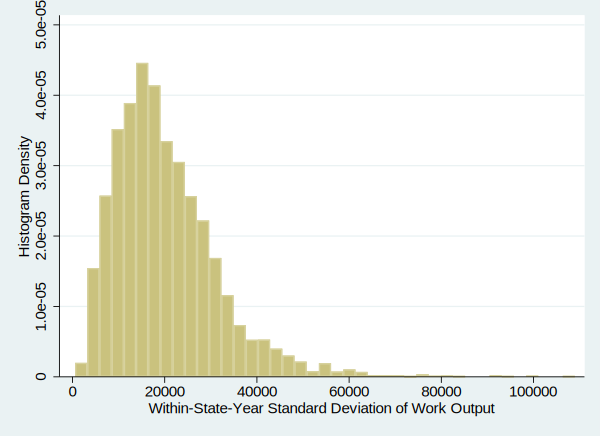




(file 0-summ-stats/hist-txt-words-sdst.pdf written in PDF format)


In [7]:
hist txt_words_sdst, xtitle("Within-State-Year Standard Deviation of Work Output") ytitle("Histogram Density")
graph export "0-summ-stats/hist-txt-words-sdst.pdf", replace


(bin=41, start=0, width=2.8687495)


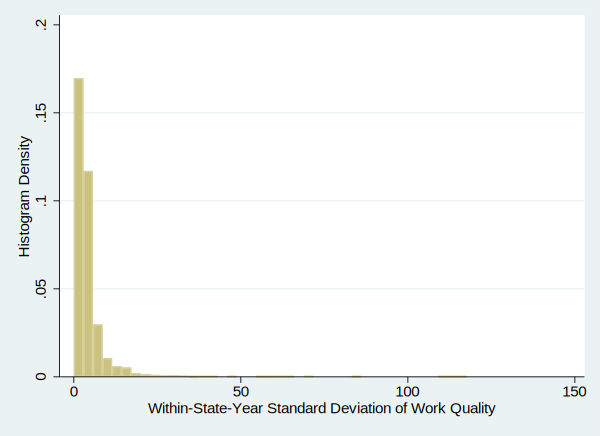




(file 0-summ-stats/hist-cites-pos-m-sdst.pdf written in PDF format)


In [8]:
hist cites_pos_m_sdst, xtitle("Within-State-Year Standard Deviation of Work Quality") ytitle("Histogram Density")
graph export "0-summ-stats/hist-cites-pos-m-sdst.pdf", replace


(bin=41, start=101.82338, width=2446.8227)


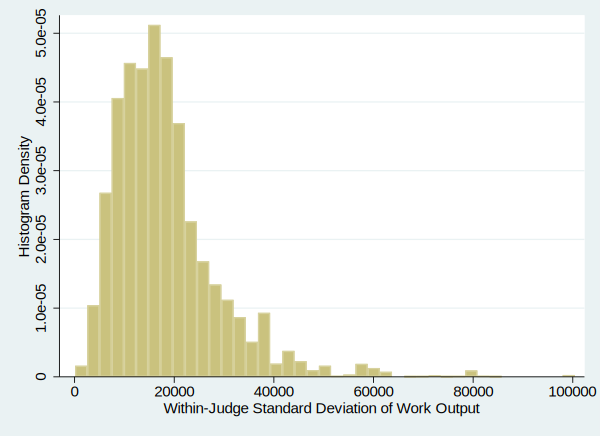




(file 0-summ-stats/hist-txt-words-sdj.pdf written in PDF format)


In [9]:
hist txt_words_sdj, xtitle("Within-Judge Standard Deviation of Work Output") ytitle("Histogram Density")
graph export "0-summ-stats/hist-txt-words-sdj.pdf", replace


(bin=41, start=0, width=2.5969112)


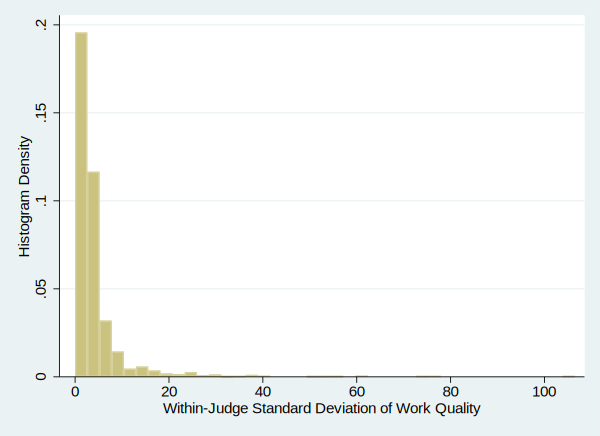




(file 0-summ-stats/hist-cites-pos-m-sdj.pdf written in PDF format)


In [10]:
hist cites_pos_m_sdj, xtitle("Within-Judge Standard Deviation of Work Quality") ytitle("Histogram Density")
graph export "0-summ-stats/hist-cites-pos-m-sdj.pdf", replace

In [11]:
### Relative R-squared of fixed effects.

Unknown #command


In [12]:
eststo clear
eststo: reghdfe txt_words, absorb(stateyearfe)
eststo: reghdfe txt_words, absorb(judgenum)
eststo: reghdfe txt_words, absorb(stateyearfe judgenum)
eststo: reghdfe cites_pos_m, absorb(stateyearfe)
eststo: reghdfe cites_pos_m, absorb(judgenum)
eststo: reghdfe cites_pos_m, absorb(stateyearfe judgenum)
esttab using 0-summ-stats/marginal-r2.csv, r2 nocons replace



(dropped 8 singleton observations)
(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     15,002
Absorbing 1 HDFE group                            F(   0,  12562) =          .
                                                  Prob > F        =          .
                                                  R-squared       =     0.5662
                                                  Adj R-squared   =     0.4819
                                                  Within R-sq.    =     0.0000
                                                  Root MSE        = 23418.8845

------------------------------------------------------------------------------
   txt_words |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       _cons |   56370.86   191.2016   294.82   0.000     55996.08    56745.65
-------------------------------------------------

(est6 stored)

(output written to 0-summ-stats/marginal-r2.csv)


In [13]:
%html
esttab, r2 nocons html

This front-end or document format cannot display HTML

(1) and (4): state-year FEs; (2) and (5): judge FEs; (3) and (6): both.

### Bar association ratings, additional outcomes.

In [14]:
eststo clear
foreach y in `yvars' `qvars' {
eststo: qui reghdfe x_rating_good pca_* `y'_st if year >= 1988, absorb(state year) cl(state)
}
esttab using 0-summ-stats/bar-evals-ols-appendix.csv,  replace ar2 se star(+ 0.10 * 0.05 ** 0.01) drop(pca_* )



(est1 stored)
(est2 stored)
(est3 stored)
(est4 stored)
(est5 stored)
(est6 stored)
(est7 stored)
(est8 stored)
(est9 stored)
(est10 stored)
(est11 stored)
(est12 stored)
(est13 stored)
(est14 stored)
(est15 stored)
(est16 stored)
(est17 stored)
(est18 stored)
(est19 stored)
(est20 stored)
(est21 stored)
(est22 stored)
(est23 stored)
(est24 stored)
(est25 stored)
(est26 stored)
(est27 stored)
(est28 stored)
(est29 stored)
(est30 stored)
(est31 stored)
(est32 stored)
(est33 stored)

(output written to 0-summ-stats/bar-evals-ols-appendix.csv)


In [15]:
%html
esttab , ar2 se star(+ 0.10 * 0.05 ** 0.01) drop(pca_* ) html 

This front-end or document format cannot display HTML

### Replication of Choi-Gulati-Posner 2010.

In [16]:
eststo clear

eststo: areg numops_log rule_P rule_NP rule_U, absorb(year) cluster(state)
eststo: areg cites_outstate_log rule_P rule_NP rule_U, absorb(year) cluster(state)
eststo: areg dis_numops_log rule_P rule_NP rule_U, absorb(year) cluster(state)

esttab using "0-summ-stats/choi-gulati-posner.csv", replace ar2 se star(+ 0.10 * 0.05 ** 0.01) 




Linear regression, absorbing indicators         Number of obs     =     15,010
                                                F(   3,     49)   =       1.33
                                                Prob > F          =     0.2766
                                                R-squared         =     0.0325
                                                Adj R-squared     =     0.0292
                                                Root MSE          =     0.5565

                                 (Std. Err. adjusted for 50 clusters in state)
------------------------------------------------------------------------------
             |               Robust
  numops_log |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      rule_P |   .1902881   .1196177     1.59   0.118    -.0500926    .4306688
     rule_NP |   .0815708   .1044626     0.78   0.439    -.1283546    .2914962
      rule_U

In [17]:
%html
esttab , ar2 se star(+ 0.10 * 0.05 ** 0.01)  html drop(_cons)

This front-end or document format cannot display HTML

---

# Selection System Analysis: Additional Results

### Preferred specification without group-normalization of variance.

In [18]:
eststo clear
foreach y in `mainvars' cites_pos_norm numops_norm `additional_vars' {
eststo: reghdfe `y'  ptonpselect ptomselect nptomselect pca_*, absorb(stateyear) cluster(state year)
}
esttab using "1-select/A-non-standard-regs.csv", replace ar2 se star(+ 0.10 * 0.05 ** 0.01) drop(  pca_* )



(dropped 8 singleton observations)
(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     15,002
Absorbing 1 HDFE group                            F(   8,     47) =     132.69
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.7250
                                                  Adj R-squared   =     0.6714
Number of clusters (state)   =         50         Within R-sq.    =     0.3660
Number of clusters (year)    =         48         Root MSE        =     0.5003

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
txt_w~s_norm |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 ptonpselect 

       pca_5 |  -.0385502   .0047594    -8.10   0.000    -.0481249   -.0289755
       _cons |     .07768    .015962     4.87   0.000     .0455686    .1097913
------------------------------------------------------------------------------

Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
 stateyearfe |      2440        2440           0    *|
-----------------------------------------------------+
* = FE nested within cluster; treated as redundant for DoF computation
(est4 stored)
(dropped 8 singleton observations)
(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     15,002
Absorbing 1 HDFE group                            F(   8,     47) =     128.49
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squar

-------------+----------------------------------------------------------------
 ptonpselect |   .0860499   .0445223     1.93   0.059    -.0035174    .1756173
  ptomselect |   .1133851   .0497373     2.28   0.027     .0133266    .2134436
 nptomselect |   .0035883   .0928758     0.04   0.969    -.1832537    .1904304
       pca_1 |   .0016266   .0042131     0.39   0.701     -.006849    .0101023
       pca_2 |   .0163222   .0036558     4.46   0.000     .0089676    .0236768
       pca_3 |  -.0001017   .0053781    -0.02   0.985    -.0109211    .0107177
       pca_4 |  -.0048332   .0034083    -1.42   0.163    -.0116899    .0020235
       pca_5 |  -.0185452   .0032586    -5.69   0.000    -.0251007   -.0119898
       _cons |   .2542966   .0090161    28.20   0.000     .2361585    .2724348
------------------------------------------------------------------------------

Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num.

In [19]:
%html
esttab , ar2 se star(+ 0.10 * 0.05 ** 0.01) drop(  pca_* _cons) html 

This front-end or document format cannot display HTML

### Weight by number of opinions

In [20]:
reghdfe txt_words_norm_st ptonpselect ptomselect nptomselect pca_* [aw=numops], absorb(stateyear) cluster(state year)
reghdfe cites_pos_m_norm_st ptonpselect ptomselect nptomselect pca_* , absorb(stateyear) cluster(state year)


(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     15,002
Absorbing 1 HDFE group                            F(   8,     47) =     212.08
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.7850
                                                  Adj R-squared   =     0.7431
Number of clusters (state)   =         50         Within R-sq.    =     0.2770
Number of clusters (year)    =         48         Root MSE        =     0.8208

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
txt_wo~rm_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 ptonpselect |  -.0216298   .1161996    -0.19   0

### Log of outcomes

In [21]:
reghdfe txt_words_log_st ptonpselect ptomselect nptomselect pca_*, absorb(stateyear) cluster(state year)
reghdfe cites_pos_m_log_st ptonpselect ptomselect nptomselect pca_* , absorb(stateyear) cluster(state year)


(dropped 8 singleton observations)
(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     15,002
Absorbing 1 HDFE group                            F(   8,     47) =       7.17
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.4531
                                                  Adj R-squared   =     0.3465
Number of clusters (state)   =         50         Within R-sq.    =     0.1087
Number of clusters (year)    =         48         Root MSE        =     0.3713

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
txt~s_log_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 ptonpselect |

### Additional case control factors (10 principal components)

In [22]:
reghdfe txt_words_norm_st ptonpselect ptomselect nptomselect pca10_* , absorb(stateyear) cluster(state year)
reghdfe cites_pos_m_norm_st ptonpselect ptomselect nptomselect pca10_* , absorb(stateyear) cluster(state year)


(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     15,002
Absorbing 1 HDFE group                            F(  12,     47) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.8414
                                                  Adj R-squared   =     0.8104
Number of clusters (state)   =         50         Within R-sq.    =     0.3171
Number of clusters (year)    =         48         Root MSE        =     0.8268

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
txt_wo~rm_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 ptonpselect |    .005997   .0534768     0.11   0

### Drop first and last year of judge career

In [23]:
reghdfe txt_words_norm_st ptonpselect ptomselect nptomselect pca_* if !first_or_last, absorb(stateyear) cluster(state year)
reghdfe cites_pos_m_norm_st ptonpselect ptomselect nptomselect pca_* if !first_or_last, absorb(stateyear) cluster(state year)


(dropped 5 singleton observations)
(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     13,262
Absorbing 1 HDFE group                            F(   8,     46) =     135.33
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.8409
                                                  Adj R-squared   =     0.8059
Number of clusters (state)   =         50         Within R-sq.    =     0.2545
Number of clusters (year)    =         47         Root MSE        =     0.8443

                            (Std. Err. adjusted for 47 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
txt_wo~rm_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 ptonpselect |

### State trends in judge starting year
Only significant with state-year clustering.

In [24]:
reghdfe txt_words_st ptonpselect ptomselect nptomselect pca_* , absorb(stateyear statefe##c.x_year_start) cluster(state year)
reghdfe txt_words_st ptonpselect ptomselect nptomselect pca_* , absorb(stateyear statefe##c.x_year_start) cluster(stateyear)
reghdfe cites_pos_m_st ptonpselect ptomselect nptomselect pca_* , absorb(stateyear statefe##c.x_year_start) cluster(state year)
reghdfe cites_pos_m_st ptonpselect ptomselect nptomselect pca_* , absorb(stateyear statefe##c.x_year_start) cluster(stateyear)


(dropped 8 singleton observations)
(MWFE estimator converged in 16 iterations)

HDFE Linear regression                            Number of obs   =     15,002
Absorbing 2 HDFE groups                           F(   8,     47) =     136.93
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.4649
                                                  Adj R-squared   =     0.3552
Number of clusters (state)   =         50         Within R-sq.    =     0.3251
Number of clusters (year)    =         48         Root MSE        =     0.6006

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
txt_words_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 ptonpselect 

  ptomselect |   .0791468    .051134     1.55   0.122    -.0211238    .1794174
 nptomselect |  -.0521208   .0668308    -0.78   0.436    -.1831718    .0789302
       pca_1 |   .0090113   .0037566     2.40   0.017     .0016449    .0163777
       pca_2 |   .0219554   .0040824     5.38   0.000       .01395    .0299608
       pca_3 |  -.0055123   .0041392    -1.33   0.183     -.013629    .0026045
       pca_4 |  -.0055962    .004008    -1.40   0.163    -.0134556    .0022631
       pca_5 |  -.0269986   .0037874    -7.13   0.000    -.0344254   -.0195717
       _cons |   .3847959   .0081726    47.08   0.000     .3687699    .4008219
------------------------------------------------------------------------------

Absorbed degrees of freedom:
----------------------------------------------------------------+
            Absorbed FE | Categories  - Redundant  = Num. Coefs |
------------------------+---------------------------------------|
            stateyearfe |      2438        2438           0  

### Baseline specification, all other outcomes

In [25]:
eststo clear
foreach y in `morevars' {
eststo: reghdfe `y'_st  ptonpselect ptomselect nptomselect pca_*, absorb(stateyear) cluster(state year)
}
esttab using "1-select/A-morevars.csv", replace ar2 se star(+ 0.10 * 0.05 ** 0.01) drop(  pca_* )



(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     14,825
Absorbing 1 HDFE group                            F(   8,     47) =      10.69
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.8404
                                                  Adj R-squared   =     0.8096
Number of clusters (state)   =         50         Within R-sq.    =     0.0125
Number of clusters (year)    =         48         Root MSE        =     0.9940

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
disc_num~_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 ptonpselect |   .5285543   .2560031     2.06   

------------------------------------------------------------------------------

Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
 stateyearfe |      2329        2329           0    *|
-----------------------------------------------------+
* = FE nested within cluster; treated as redundant for DoF computation
(est4 stored)
(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     14,648
Absorbing 1 HDFE group                            F(   8,     47) =      46.01
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.9882
                                                  Adj R-squared   =     0.9859
Number of clusters (state)   =         50         Within R-sq.    =     0.2080
Number of clu

       pca_1 |   .0377446    .011264     3.35   0.002     .0150844    .0604048
       pca_2 |   .0026112   .0077712     0.34   0.738    -.0130225    .0182449
       pca_3 |  -.0040028   .0084762    -0.47   0.639    -.0210547    .0130492
       pca_4 |   .0264936   .0069369     3.82   0.000     .0125383    .0404488
       pca_5 |  -.0148863   .0055283    -2.69   0.010    -.0260078   -.0037647
       _cons |   4.648212   .0217619   213.59   0.000     4.604433    4.691992
------------------------------------------------------------------------------

Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
 stateyearfe |      2440        2440           0    *|
-----------------------------------------------------+
* = FE nested within cluster; treated as redundant for DoF computation
(est8 stored)
(MWFE estimator converged in 1 iterations)

HDFE Linear r

             |               Robust
cites_ci~_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 ptonpselect |    .165608   .1707163     0.97   0.337    -.1778288    .5090449
  ptomselect |   .1935007   .0702248     2.76   0.008     .0522267    .3347747
 nptomselect |   .0394928   .1267244     0.31   0.757    -.2154438    .2944294
       pca_1 |   .0364433   .0087904     4.15   0.000     .0187592    .0541274
       pca_2 |  -.0142426   .0063245    -2.25   0.029    -.0269658   -.0015194
       pca_3 |   .0510028   .0076105     6.70   0.000     .0356924    .0663132
       pca_4 |   -.002667   .0072459    -0.37   0.714    -.0172438    .0119099
       pca_5 |  -.0234944   .0059994    -3.92   0.000    -.0355636   -.0114251
       _cons |   1.738084   .0169303   102.66   0.000     1.704025    1.772144
------------------------------------------------------------------------------

Absorbed degree

In [26]:
%html
esttab , ar2 se star(+ 0.10 * 0.05 ** 0.01) drop(  pca_* _cons) html

This front-end or document format cannot display HTML

Relative to partisan colleagues, nonpartisan judges write more discretionary opinions and are overruled less often. 

### Require at least 2 judges from each system

In [27]:
eststo clear 
foreach y in `main_st' `additional_st'  {
eststo: reghdfe `y' pnpselect2 pnpselect2np pmselect2 pmselect2m npselect2 npmselect2m pca_* , absorb(stateyear ) cluster(state year)
}
esttab using "1-select/A-2judges.csv", replace ar2 se star(+ 0.10 * 0.05 ** 0.01) drop( pca_* pmselect2 npselect2 )



(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     15,002
Absorbing 1 HDFE group                            F(  11,     47) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.8377
                                                  Adj R-squared   =     0.8061
Number of clusters (state)   =         50         Within R-sq.    =     0.3013
Number of clusters (year)    =         48         Root MSE        =     0.8363

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
txt_wo~rm_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
  pnpselect2 |   .3521708    .290879     1.21   

                                                  Adj R-squared   =     0.8198
Number of clusters (state)   =         50         Within R-sq.    =     0.3045
Number of clusters (year)    =         48         Root MSE        =     0.8343

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
txt_sent~_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
  pnpselect2 |   .5334166    .281029     1.90   0.064    -.0319408    1.098774
pnpselect2np |  -.5408586   .2657608    -2.04   0.047      -1.0755   -.0062168
   pmselect2 |   -.029824   .1541597    -0.19   0.847    -.3399533    .2803053
  pmselect2m |   .0334957   .1615166     0.21   0.837    -.2914338    .3584253
   npselect2 |   .0941244   .1537565     0.61   0.543    -.2151937    .4034425
 npmselect2m | 

  pnpselect2 |  -.0840638   .2203828    -0.38   0.705    -.5274169    .3592893
pnpselect2np |  -.0005075   .1708448    -0.00   0.998     -.344203    .3431879
   pmselect2 |  -.3522826   .2169821    -1.62   0.111    -.7887942     .084229
  pmselect2m |   .3499371   .1211268     2.89   0.006     .1062615    .5936127
   npselect2 |   .1382133   .0891032     1.55   0.128    -.0410393    .3174659
 npmselect2m |   .1380282   .2244743     0.61   0.542    -.3135559    .5896124
       pca_1 |    .029891   .0101894     2.93   0.005     .0093926    .0503894
       pca_2 |   .0257471   .0087039     2.96   0.005     .0082371    .0432572
       pca_3 |    .022932   .0140088     1.64   0.108    -.0052501    .0511141
       pca_4 |  -.0047866   .0094414    -0.51   0.615    -.0237803    .0142071
       pca_5 |  -.0231422   .0068763    -3.37   0.002    -.0369756   -.0093087
       _cons |  -.7757845   .0389746   -19.90   0.000    -.8541913   -.6973777
----------------------------------------------------

In [28]:
%html
esttab , ar2 se star(+ 0.10 * 0.05 ** 0.01) drop( pca_* pmselect2 npselect2 pnpselect2 _cons) html

This front-end or document format cannot display HTML

### Checking sensitivity to windows before and after

In [29]:
reghdfe cites_pos_m_norm ptonpselect ptomselect nptomselect if (abs(ptomdiff) < 11 | abs(nptomdiff) < 11 | abs(ptonpdiff) < 11)  , absorb(stateyear) cluster(state)

reghdfe cites_pos_m_norm ptonpselect ptomselect nptomselect if (abs(ptomdiff) < 6 | abs(nptomdiff) < 6 | abs(ptonpdiff) < 6)  , absorb(stateyear) cluster(state year)


(dropped 56 singleton observations)
(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =      2,214
Absorbing 1 HDFE group                            F(   3,     16) =       3.53
Statistics robust to heteroskedasticity           Prob > F        =     0.0390
                                                  R-squared       =     0.5942
                                                  Adj R-squared   =     0.4815
                                                  Within R-sq.    =     0.0097
Number of clusters (state)   =         17         Root MSE        =     0.3102

                                 (Std. Err. adjusted for 17 clusters in state)
------------------------------------------------------------------------------
             |               Robust
ci~os_m_norm |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 ptonpselect 

### drop each state individually 
Partisan to non-partisan is always significant. Partisan to merit is smaller (still positive), marginally insignificant, when dropping Indiana or Oklahoma.

In [43]:
eststo clear
foreach s in GA KY UT CO IA IN KS NE OK TN {

eststo: reghdfe cites_pos_m_norm_st  ptonpselect ptomselect nptomselect pca_* if stateabb != "`s'", absorb(stateyear) cluster(state year)

}
esttab using "1-select/drop-states.csv", replace ar2 se star(+ 0.10 * 0.05 ** 0.01) drop(  pca_* )



(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     14,650
Absorbing 1 HDFE group                            F(   8,     47) =      13.85
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.9773
                                                  Adj R-squared   =     0.9729
Number of clusters (state)   =         49         Within R-sq.    =     0.0104
Number of clusters (year)    =         48         Root MSE        =     0.9951

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
cites_pos_.. |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 ptonpselect |   .3622368   .1322305     2.74   

       pca_4 |  -.0152874    .007184    -2.13   0.039    -.0297397    -.000835
       pca_5 |  -.0401067   .0069313    -5.79   0.000    -.0540506   -.0261627
       _cons |  -.4114877   .0255025   -16.14   0.000    -.4627921   -.3601833
------------------------------------------------------------------------------

Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
 stateyearfe |      2390        2390           0    *|
-----------------------------------------------------+
* = FE nested within cluster; treated as redundant for DoF computation
(est4 stored)
(MWFE estimator converged in 1 iterations)

HDFE Linear regression                            Number of obs   =     14,557
Absorbing 1 HDFE group                            F(   8,     47) =      12.28
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
             

 ptonpselect |   .2990959   .0918267     3.26   0.002     .1143645    .4838274
  ptomselect |   .4273185   .1531012     2.79   0.008     .1193185    .7353184
 nptomselect |  -.0220845   .2886909    -0.08   0.939    -.6028558    .5586867
       pca_1 |   .0095144   .0125983     0.76   0.454    -.0158301     .034859
       pca_2 |   .0361551   .0067857     5.33   0.000     .0225042    .0498061
       pca_3 |  -.0094637   .0102067    -0.93   0.359    -.0299969    .0110695
       pca_4 |  -.0145132   .0074705    -1.94   0.058    -.0295419    .0005155
       pca_5 |  -.0390859   .0070341    -5.56   0.000    -.0532366   -.0249351
       _cons |  -.3808731   .0261406   -14.57   0.000    -.4334612    -.328285
------------------------------------------------------------------------------

Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
 stateyearfe | 

In [31]:
%html
esttab , ar2 se star(+ 0.10 * 0.05 ** 0.01) drop(  pca_* ) html

This front-end or document format cannot display HTML

---

# Election Cycle: Additional Results

### Preferred specification without variance normalization, or normalizing within judge instead.

In [32]:
eststo clear
foreach y in  `mainvars'  cites_pos_norm numops_norm `main_j' `morevars' {
eststo: reghdfe `y' 			 electupP electupNP electupU `caseX'  if elect_include, absorb(stateyearfe judgenum exper5) cluster(state year)
}
esttab using "2-elect/A-main-regs.csv", replace ar2 se star(+ 0.10 * 0.05 ** 0.01) drop( pca_* )



(MWFE estimator converged in 59 iterations)

HDFE Linear regression                            Number of obs   =     14,890
Absorbing 3 HDFE groups                           F(   8,     47) =     148.93
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.8555
                                                  Adj R-squared   =     0.8042
Number of clusters (state)   =         50         Within R-sq.    =     0.3516
Number of clusters (year)    =         48         Root MSE        =     0.3860

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
txt_w~s_norm |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    electupP |  -.0511739   .0208144    -2.46  

    electupU |    -.02693   .0238685    -1.13   0.265    -.0749472    .0210872
       pca_1 |   .1720705   .0081431    21.13   0.000     .1556887    .1884523
       pca_2 |   .0270698   .0044266     6.12   0.000     .0181645     .035975
       pca_3 |  -.0740457   .0059048   -12.54   0.000    -.0859247   -.0621667
       pca_4 |  -.0457773   .0048304    -9.48   0.000    -.0554948   -.0360598
       pca_5 |  -.0309366   .0040252    -7.69   0.000    -.0390344   -.0228389
       _cons |   .1197177   .0160914     7.44   0.000     .0873459    .1520895
------------------------------------------------------------------------------

Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
 stateyearfe |      2438        2438           0    *|
    judgenum |      1451        1451           0    *|
      exper5 |         8           0           8     |
--------

(est7 stored)
(MWFE estimator converged in 59 iterations)

HDFE Linear regression                            Number of obs   =     14,890
Absorbing 3 HDFE groups                           F(   8,     47) =      35.58
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.7860
                                                  Adj R-squared   =     0.7099
Number of clusters (state)   =         50         Within R-sq.    =     0.0049
Number of clusters (year)    =         48         Root MSE        =     3.1167

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
  dis_numops |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    electupP |   .0096094   .143774

       pca_4 |  -.0163304   .0013604   -12.00   0.000    -.0190671   -.0135937
       pca_5 |  -.0109282   .0010358   -10.55   0.000     -.013012   -.0088445
       _cons |   .3025687   .0034378    88.01   0.000     .2956528    .3094846
------------------------------------------------------------------------------

Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
 stateyearfe |      2438        2438           0    *|
    judgenum |      1451        1451           0    *|
      exper5 |         8           0           8     |
-----------------------------------------------------+
* = FE nested within cluster; treated as redundant for DoF computation
(est11 stored)
(MWFE estimator converged in 59 iterations)

HDFE Linear regression                            Number of obs   =     14,890
Absorbing 3 HDFE groups                           F(   8,  

                                                  Adj R-squared   =     0.8347
Number of clusters (state)   =         50         Within R-sq.    =     0.0046
Number of clusters (year)    =         48         Root MSE        =     0.3637

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
toc_uniqu~rm |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    electupP |  -.0110666   .0148657    -0.74   0.460    -.0409725    .0188393
   electupNP |  -.0329869     .02063    -1.60   0.117    -.0744892    .0085154
    electupU |   .0586002   .0244467     2.40   0.021     .0094199    .1077806
       pca_1 |  -.0039295   .0026807    -1.47   0.149    -.0093223    .0014633
       pca_2 |    .002574   .0026648     0.97   0.339    -.0027869     .007935
       pca_3 | 

       pca_5 |  -.0151013   .0114205    -1.32   0.192    -.0380763    .0078737
       _cons |   .6460929   .0326228    19.80   0.000     .5804642    .7117215
------------------------------------------------------------------------------

Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
 stateyearfe |      2438        2438           0    *|
    judgenum |      1451        1451           0    *|
      exper5 |         8           0           8     |
-----------------------------------------------------+
* = FE nested within cluster; treated as redundant for DoF computation
(est18 stored)
(MWFE estimator converged in 59 iterations)

HDFE Linear regression                            Number of obs   =     14,890
Absorbing 3 HDFE groups                           F(   8,     47) =       1.66
Statistics robust to heteroskedasticity           Prob > F 

In [33]:
%html
esttab , ar2 se star(+ 0.10 * 0.05 ** 0.01) drop( pca_* ) html

This front-end or document format cannot display HTML

### Weight by number of opinions

In [34]:
reghdfe txt_words_norm_st 			 electupP electupNP electupU if elect_include [aw=numops], absorb(stateyearfe judgenum) cluster(state year)
reghdfe cites_pos_m_norm_st 			 electupP electupNP electupU if elect_include [aw=numops], absorb(stateyearfe judgenum) cluster(state year)


(MWFE estimator converged in 61 iterations)

HDFE Linear regression                            Number of obs   =     14,890
Absorbing 2 HDFE groups                           F(   3,     47) =       8.01
Statistics robust to heteroskedasticity           Prob > F        =     0.0002
                                                  R-squared       =     0.8569
                                                  Adj R-squared   =     0.8063
Number of clusters (state)   =         50         Within R-sq.    =     0.0021
Number of clusters (year)    =         48         Root MSE        =     0.7113

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
txt_wo~rm_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    electupP |  -.1107972   .0543602    -2.04   

### Log outcomes

In [35]:
reghdfe txt_words_log_st 			 electupP electupNP electupU if elect_include , absorb(stateyearfe judgenum) cluster(state year)
reghdfe cites_pos_m_log_st 			 electupP electupNP electupU if elect_include , absorb(stateyearfe judgenum) cluster(state year)



(MWFE estimator converged in 51 iterations)

HDFE Linear regression                            Number of obs   =     14,890
Absorbing 2 HDFE groups                           F(   3,     47) =       1.54
Statistics robust to heteroskedasticity           Prob > F        =     0.2164
                                                  R-squared       =     0.6221
                                                  Adj R-squared   =     0.4885
Number of clusters (state)   =         50         Within R-sq.    =     0.0005
Number of clusters (year)    =         48         Root MSE        =     0.3273

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
txt~s_log_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    electupP |  -.0208929   .0228185    -0.92   

### More case control factors

In [36]:
reghdfe txt_words_norm_st 			 electupP electupNP electupU pca10_* if elect_include , absorb(stateyearfe judgenum) cluster(state year)
reghdfe cites_pos_m_norm_st 			 electupP electupNP electupU pca10_* if elect_include , absorb(stateyearfe judgenum) cluster(state year)


(MWFE estimator converged in 52 iterations)

HDFE Linear regression                            Number of obs   =     14,890
Absorbing 2 HDFE groups                           F(  12,     47) =      80.98
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.9153
                                                  Adj R-squared   =     0.8853
Number of clusters (state)   =         50         Within R-sq.    =     0.3184
Number of clusters (year)    =         48         Root MSE        =     0.6414

                            (Std. Err. adjusted for 48 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
txt_wo~rm_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    electupP |  -.1114431   .0420317    -2.65   

### Drop first and last year of judge career

In [37]:
reghdfe txt_words_norm_st 			 electupP electupNP electupU pca_* if elect_include & !first_or_last, absorb(stateyearfe judgenum) cluster(state year)
reghdfe cites_pos_m_norm_st 			 electupP electupNP electupU pca_* if elect_include & !first_or_last, absorb(stateyearfe judgenum) cluster(state year)


(dropped 86 singleton observations)
(MWFE estimator converged in 59 iterations)

HDFE Linear regression                            Number of obs   =     13,137
Absorbing 2 HDFE groups                           F(   8,     46) =     107.70
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.9203
                                                  Adj R-squared   =     0.8888
Number of clusters (state)   =         50         Within R-sq.    =     0.2035
Number of clusters (year)    =         47         Root MSE        =     0.6373

                            (Std. Err. adjusted for 47 clusters in state year)
------------------------------------------------------------------------------
             |               Robust
txt_wo~rm_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    electupP

### Continuous treatment specification: effect of proximity to election

In [38]:
eststo clear

foreach y in  `main_st' {
eststo: reghdfe `y' 			 elect_next_NP elect_next_P elect_next_U, absorb(stateyearfe judgenum) cluster(state year)
}
esttab using "2-elect/A-linear-regs.csv", replace ar2 se star(+ 0.10 * 0.05 ** 0.01) 




(dropped 300 singleton observations)
(MWFE estimator converged in 65 iterations)

HDFE Linear regression                            Number of obs   =      6,811
Absorbing 2 HDFE groups                           F(   3,     38) =       4.38
Statistics robust to heteroskedasticity           Prob > F        =     0.0096
                                                  R-squared       =     0.9006
                                                  Adj R-squared   =     0.8443
Number of clusters (state)   =         39         Within R-sq.    =     0.0078
Number of clusters (year)    =         48         Root MSE        =     0.7483

                             (Std. Err. adjusted for 39 clusters in state year)
-------------------------------------------------------------------------------
              |               Robust
txt_wor~rm_st |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
elect

In [39]:
%html
esttab , ar2 se star(+ 0.10 * 0.05 ** 0.01) html

This front-end or document format cannot display HTML

# Retention Reform, Additional Results

### Main specification without variance normalization. And with additional outcomes.

In [42]:
eststo clear
foreach y in `mainvars' cites_pos_norm numops_norm `morevars' {
eststo: reghdfe `y' ptonp10 ptonp10window ptou10 ptou10window nptou10 nptou10window  if retain_include, a(judgenum year statefe#c.year) cl(state year)
}
esttab using "3-retain/1-main-regs.csv", replace ar2 se star(+ 0.10 * 0.05 ** 0.01) drop( *window *year)



(dropped 21 singleton observations)
(MWFE estimator converged in 150 iterations)

HDFE Linear regression                            Number of obs   =     13,756
Absorbing 3 HDFE groups                           F(   6,     43) =       8.72
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.6435
                                                  Adj R-squared   =     0.6011
Number of clusters (state)   =         50         Within R-sq.    =     0.0042
Number of clusters (year)    =         44         Root MSE        =     0.5563

                             (Std. Err. adjusted for 44 clusters in state year)
-------------------------------------------------------------------------------
              |               Robust
txt_words_n~m |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
     

 ptou10window |    .061851   .1344227     0.46   0.648    -.2092383    .3329403
      nptou10 |  -.1995754   .1646328    -1.21   0.232     -.531589    .1324382
nptou10window |   .1854738   .1763183     1.05   0.299     -.170106    .5410536
        _cons |   .4549542   .0140611    32.36   0.000     .4265972    .4833111
-------------------------------------------------------------------------------

Absorbed degrees of freedom:
--------------------------------------------------------+
    Absorbed FE | Categories  - Redundant  = Num. Coefs |
----------------+---------------------------------------|
       judgenum |      1360        1360           0    *|
           year |        44          44           0    *|
 statefe#c.year |        52           0          52    ?|
--------------------------------------------------------+
? = number of redundant parameters may be higher
* = FE nested within cluster; treated as redundant for DoF computation
(est4 stored)
(dropped 21 singleton observat

Absorbing 3 HDFE groups                           F(   6,     43) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.3046
                                                  Adj R-squared   =     0.2220
Number of clusters (state)   =         50         Within R-sq.    =     0.0017
Number of clusters (year)    =         44         Root MSE        =     0.0685

                             (Std. Err. adjusted for 44 clusters in state year)
-------------------------------------------------------------------------------
              |               Robust
casetype_ad~m |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      ptonp10 |  -.0091736   .0163822    -0.56   0.578    -.0422115    .0238644
ptonp10window |   .0273166   .0196473     1.39   0.172    -.0123058    .0669391
       p

        _cons |   .5015876   .0019203   261.20   0.000     .4977149    .5054604
-------------------------------------------------------------------------------

Absorbed degrees of freedom:
--------------------------------------------------------+
    Absorbed FE | Categories  - Redundant  = Num. Coefs |
----------------+---------------------------------------|
       judgenum |      1360        1360           0    *|
           year |        44          44           0    *|
 statefe#c.year |        52           0          52    ?|
--------------------------------------------------------+
? = number of redundant parameters may be higher
* = FE nested within cluster; treated as redundant for DoF computation
(est11 stored)
(dropped 21 singleton observations)
(MWFE estimator converged in 150 iterations)

HDFE Linear regression                            Number of obs   =     13,756
Absorbing 3 HDFE groups                           F(   6,     43) =       2.98
Statistics robust to heterosk

Number of clusters (state)   =         50         Within R-sq.    =     0.0013
Number of clusters (year)    =         44         Root MSE        =     0.5213

                             (Std. Err. adjusted for 44 clusters in state year)
-------------------------------------------------------------------------------
              |               Robust
  cites_neg_m |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      ptonp10 |   .0831033   .0642162     1.29   0.203     -.046401    .2126076
ptonp10window |  -.0086753   .0495542    -0.18   0.862    -.1086109    .0912602
       ptou10 |   .0022558   .0332748     0.07   0.946    -.0648493    .0693608
 ptou10window |   .0054464    .030166     0.18   0.858     -.055389    .0662819
      nptou10 |   .1839298   .0895876     2.05   0.046     .0032592    .3646003
nptou10window |   -.043152   .0443683    -0.97   0.336    -.1326292    .0463251
    


Absorbed degrees of freedom:
--------------------------------------------------------+
    Absorbed FE | Categories  - Redundant  = Num. Coefs |
----------------+---------------------------------------|
       judgenum |      1360        1360           0    *|
           year |        44          44           0    *|
 statefe#c.year |        52           0          52    ?|
--------------------------------------------------------+
? = number of redundant parameters may be higher
* = FE nested within cluster; treated as redundant for DoF computation
(est18 stored)
(dropped 21 singleton observations)
(MWFE estimator converged in 150 iterations)

HDFE Linear regression                            Number of obs   =     13,756
Absorbing 3 HDFE groups                           F(   6,     43) =       1.51
Statistics robust to heteroskedasticity           Prob > F        =     0.1980
                                                  R-squared       =     0.2959
                               

r(111);
r(111);


### Weight by number of opinions

In [44]:
reghdfe txt_words_norm_j pca_* `rule_controls' ptonp10 ptonp10window  nptou10 nptou10window ptou10 ptou10window [aw=numops], a(judgenum year ) cl(state year)
reghdfe cites_pos_m_norm_j pca_* `rule_controls' ptonp10 ptonp10window  nptou10 nptou10window ptou10 ptou10window [aw=numops], a(judgenum year ) cl(state year)


(dropped 21 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged in 11 iterations)
note: rule_termdown omitted because of collinearity

HDFE Linear regression                            Number of obs   =     13,760
Absorbing 2 HDFE groups                           F(  19,     43) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.8674
                                                  Adj R-squared   =     0.8521
Number of clusters (state)   =         50         Within R-sq.    =     0.3352
Number of clusters (year)    =         44         Root MSE        =     0.7636

                                   (Std. Err. adjusted for 44 clusters in state year)
-------------------------------------------------------------------------------------
           

### Log outcomes

In [45]:
reghdfe txt_words_log_j pca_* `rule_controls' ptonp10 ptonp10window  nptou10 nptou10window ptou10 ptou10window, a(judgenum year ) cl(state year)
reghdfe cites_pos_m_log_j pca_* `rule_controls' ptonp10 ptonp10window  nptou10 nptou10window ptou10 ptou10window, a(judgenum year ) cl(state year)


(dropped 90 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged in 11 iterations)
note: rule_termdown omitted because of collinearity

HDFE Linear regression                            Number of obs   =     13,760
Absorbing 2 HDFE groups                           F(  19,     43) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.4877
                                                  Adj R-squared   =     0.4286
Number of clusters (state)   =         50         Within R-sq.    =     0.2725
Number of clusters (year)    =         44         Root MSE        =     0.5917

                                   (Std. Err. adjusted for 44 clusters in state year)
-------------------------------------------------------------------------------------
           

### More case control factors

In [46]:
reghdfe txt_words_norm_j pca10_* `rule_controls' ptonp10 ptonp10window nptou10 nptou10window ptou10 ptou10window, a(judgenum year ) cl(state year)
reghdfe cites_pos_m_norm_j pca10_* `rule_controls' ptonp10 ptonp10window nptou10 nptou10window ptou10 ptou10window, a(judgenum year ) cl(state year)


(dropped 21 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged in 11 iterations)
note: rule_termdown omitted because of collinearity

HDFE Linear regression                            Number of obs   =     13,760
Absorbing 2 HDFE groups                           F(  23,     43) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.9207
                                                  Adj R-squared   =     0.9115
Number of clusters (state)   =         50         Within R-sq.    =     0.3940
Number of clusters (year)    =         44         Root MSE        =     0.7660

                                   (Std. Err. adjusted for 44 clusters in state year)
-------------------------------------------------------------------------------------
           

### Drop first and last years of judge career

In [47]:
reghdfe txt_words_norm_j pca_* `rule_controls' i.statefe#c.year ptonp10 ptonp10window nptou10 nptou10window ptou10 ptou10window if retain_include & !first_or_last, a(judgenum year ) cl(state year)
reghdfe cites_pos_m_norm_j pca_* `rule_controls' i.statefe#c.year ptonp10 ptonp10window nptou10 nptou10window ptou10 ptou10window if retain_include & !first_or_last, a(judgenum year ) cl(state year)


(dropped 89 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged in 11 iterations)
note: rule_termdown omitted because of collinearity
note: 52.statefe#c.year omitted because of collinearity

HDFE Linear regression                            Number of obs   =     12,123
Absorbing 2 HDFE groups                           F(  70,     42) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.9034
                                                  Adj R-squared   =     0.8911
Number of clusters (state)   =         50         Within R-sq.    =     0.3327
Number of clusters (year)    =         43         Root MSE        =     0.7545

                                   (Std. Err. adjusted for 43 clusters in state year)
-----------------------------------------

* = FE nested within cluster; treated as redundant for DoF computation

(dropped 89 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged in 11 iterations)
note: rule_termdown omitted because of collinearity
note: 52.statefe#c.year omitted because of collinearity

HDFE Linear regression                            Number of obs   =     12,123
Absorbing 2 HDFE groups                           F(  70,     42) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.9145
                                                  Adj R-squared   =     0.9037
Number of clusters (state)   =         50         Within R-sq.    =     0.0404
Number of clusters (year)    =         43         Root MSE        =     0.9458

                                   (Std. Err. adjusted f

        year |        43          43           0    *|
-----------------------------------------------------+
* = FE nested within cluster; treated as redundant for DoF computation


### Other effect windows

In [48]:

eststo clear

*// nptou effect is seen with at least window = 8

foreach w in 4 6 8 10 12 {

eststo: reghdfe cites_pos_m_norm_j i.statefe#c.year pca_* `rule_controls' ptonp`w' ptonp`w'window ptou`w' ptou`w'window nptou`w' nptou`w'window  if retain_include, a(judgenum year) cl(state year)

}

esttab using "3-retain/different-windows.csv", replace ar2 se star(+ 0.10 * 0.05 ** 0.01) drop( *window  pca_* *rule*  *year)




(dropped 21 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged in 11 iterations)
note: 52.statefe#c.year omitted because of collinearity
note: rule_termdown omitted because of collinearity

HDFE Linear regression                            Number of obs   =     13,756
Absorbing 2 HDFE groups                           F(  70,     43) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.9884
                                                  Adj R-squared   =     0.9870
Number of clusters (state)   =         50         Within R-sq.    =     0.0406
Number of clusters (year)    =         44         Root MSE        =     0.9634

                                   (Std. Err. adjusted for 44 clusters in state year)
----------------------------------------

* = FE nested within cluster; treated as redundant for DoF computation
(est1 stored)
(dropped 21 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged in 11 iterations)
note: 52.statefe#c.year omitted because of collinearity
note: rule_termdown omitted because of collinearity

HDFE Linear regression                            Number of obs   =     13,756
Absorbing 2 HDFE groups                           F(  70,     43) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.9884
                                                  Adj R-squared   =     0.9870
Number of clusters (state)   =         50         Within R-sq.    =     0.0406
Number of clusters (year)    =         44         Root MSE        =     0.9634

                                   (Std. Er

        year |        44          44           0    *|
-----------------------------------------------------+
* = FE nested within cluster; treated as redundant for DoF computation
(est2 stored)
(dropped 21 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged in 11 iterations)
note: 52.statefe#c.year omitted because of collinearity
note: rule_termdown omitted because of collinearity

HDFE Linear regression                            Number of obs   =     13,756
Absorbing 2 HDFE groups                           F(  70,     43) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.9884
                                                  Adj R-squared   =     0.9870
Number of clusters (state)   =         50         Within R-sq.    =     0.0413
Number of clu

-------------+---------------------------------------|
    judgenum |      1360        1360           0    *|
        year |        44          44           0    *|
-----------------------------------------------------+
* = FE nested within cluster; treated as redundant for DoF computation
(est3 stored)
(dropped 21 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged in 11 iterations)
note: 52.statefe#c.year omitted because of collinearity
note: rule_termdown omitted because of collinearity

HDFE Linear regression                            Number of obs   =     13,756
Absorbing 2 HDFE groups                           F(  70,     43) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.9884
                                                  Adj R-squar

-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
    judgenum |      1360        1360           0    *|
        year |        44          44           0    *|
-----------------------------------------------------+
* = FE nested within cluster; treated as redundant for DoF computation
(est4 stored)
(dropped 21 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged in 11 iterations)
note: 52.statefe#c.year omitted because of collinearity
note: rule_termdown omitted because of collinearity

HDFE Linear regression                            Number of obs   =     13,756
Absorbing 2 HDFE groups                           F(  70,     43) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                              


Absorbed degrees of freedom:
-----------------------------------------------------+
 Absorbed FE | Categories  - Redundant  = Num. Coefs |
-------------+---------------------------------------|
    judgenum |      1360        1360           0    *|
        year |        44          44           0    *|
-----------------------------------------------------+
* = FE nested within cluster; treated as redundant for DoF computation
(est5 stored)

(output written to 3-retain/different-windows.csv)


In [49]:
%html
esttab , ar2 se star(+ 0.10 * 0.05 ** 0.01) drop( *window  pca_* *rule*  *year) html


This front-end or document format cannot display HTML

### Dropping each treated state individually

In [50]:
eststo clear
foreach s in AZ FL MD SD UT WY {
eststo: reghdfe cites_pos_m_norm_j i.statefe#c.year pca_* `rule_controls' ptonp10 ptonp10window ptou10 ptou10window nptou10 nptou10window  if retain_include & stateabb != "`s'", a(judgenum year) cl(state year)
}
esttab using "3-retain/drop-states.csv", replace ar2 se star(+ 0.10 * 0.05 ** 0.01) drop( *window  pca_* *rule*  *year)



(dropped 21 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged in 11 iterations)
note: 52.statefe#c.year omitted because of collinearity
note: rule_termdown omitted because of collinearity

HDFE Linear regression                            Number of obs   =     13,545
Absorbing 2 HDFE groups                           F(  69,     43) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.9886
                                                  Adj R-squared   =     0.9872
Number of clusters (state)   =         49         Within R-sq.    =     0.0416
Number of clusters (year)    =         44         Root MSE        =     0.9631

                                   (Std. Err. adjusted for 44 clusters in state year)
----------------------------------------

(est1 stored)
(dropped 20 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged in 11 iterations)
note: 52.statefe#c.year omitted because of collinearity
note: rule_termdown omitted because of collinearity

HDFE Linear regression                            Number of obs   =     13,453
Absorbing 2 HDFE groups                           F(  69,     43) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.9887
                                                  Adj R-squared   =     0.9873
Number of clusters (state)   =         49         Within R-sq.    =     0.0423
Number of clusters (year)    =         44         Root MSE        =     0.9625

                                   (Std. Err. adjusted for 44 clusters in state year)
----------------------------

(est2 stored)
(dropped 20 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged in 11 iterations)
note: 52.statefe#c.year omitted because of collinearity
note: rule_termdown omitted because of collinearity

HDFE Linear regression                            Number of obs   =     13,457
Absorbing 2 HDFE groups                           F(  69,     43) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.9886
                                                  Adj R-squared   =     0.9873
Number of clusters (state)   =         49         Within R-sq.    =     0.0427
Number of clusters (year)    =         44         Root MSE        =     0.9627

                                   (Std. Err. adjusted for 44 clusters in state year)
----------------------------

(est3 stored)
(dropped 21 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged in 11 iterations)
note: 52.statefe#c.year omitted because of collinearity
note: rule_termdown omitted because of collinearity

HDFE Linear regression                            Number of obs   =     13,538
Absorbing 2 HDFE groups                           F(  69,     43) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.9886
                                                  Adj R-squared   =     0.9872
Number of clusters (state)   =         49         Within R-sq.    =     0.0414
Number of clusters (year)    =         44         Root MSE        =     0.9627

                                   (Std. Err. adjusted for 44 clusters in state year)
----------------------------

(est4 stored)
(dropped 20 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged in 11 iterations)
note: 52.statefe#c.year omitted because of collinearity
note: rule_termdown omitted because of collinearity

HDFE Linear regression                            Number of obs   =     13,537
Absorbing 2 HDFE groups                           F(  69,     43) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.9885
                                                  Adj R-squared   =     0.9872
Number of clusters (state)   =         49         Within R-sq.    =     0.0392
Number of clusters (year)    =         44         Root MSE        =     0.9641

                                   (Std. Err. adjusted for 44 clusters in state year)
----------------------------

(est5 stored)
(dropped 21 singleton observations)
note: rule_termdown is probably collinear with the fixed effects (all values close to zero after partialling-out; tol = 1.0e-09)
(MWFE estimator converged in 11 iterations)
note: 51.statefe#c.year omitted because of collinearity
note: rule_termdown omitted because of collinearity

HDFE Linear regression                            Number of obs   =     13,632
Absorbing 2 HDFE groups                           F(  69,     43) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.9885
                                                  Adj R-squared   =     0.9871
Number of clusters (state)   =         49         Within R-sq.    =     0.0409
Number of clusters (year)    =         44         Root MSE        =     0.9632

                                   (Std. Err. adjusted for 44 clusters in state year)
----------------------------

(est6 stored)

(output written to 3-retain/drop-states.csv)


In [51]:
%html
esttab , ar2 se star(+ 0.10 * 0.05 ** 0.01) drop( *window  pca_* *rule*  *year _cons) html

This front-end or document format cannot display HTML